In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics
import scipy.stats as stats
from datetime import datetime

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Fire/Fire-Incidents.csv')
pd.set_option('display.max_columns', None)
df.head()

Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                        Undetermined  (formerly 98)   
4  Sleeping Area or Bedroom (inc. patients room, ...   

                   Business_Impact  Civilian_Casualties  \
0         No business interruption                    0   
1                     Undetermined                    0   
2  Not applicable (not a business)                    1   
3        May not resume operations                    0   
4  Not applicable (not a business)                    8   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   
1                        28                  50000   
2                        16                1000000   
3                        12                1000000   
4                        11                 125000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24T17:06:26   
1                                     28         2018-11-24T07:19:00   
2                                    130         2017-02-09T18:02:13   
3                                     14         2012-10-30T00:52:04   
4                                      2         2018-07-08T04:35:00   

                             Extent_Of_Fire  \
0              Confined to object of origin   
1   Confined to part of room/area of origin   
2  Spread beyond room of origin, same floor   
3                          Entire Structure   
4  Spread beyond room of origin, same floor   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   
1  Not applicable: Occupant(s) first alerted by o...   
2  Some persons (at risk) evacuated as a result o...   
3                                       Undetermined   
4  Some persons (at risk) evacuated as a result o...   

                Fire_Alarm_System_Operation Fire_Alarm_System_Presence  \
0         Fire alarm system did not operate  Fire alarm system present   
1                Fire alarm system operated  Fire alarm system present   
2                Fire alarm system operated  Fire alarm system present   
3  Fire alarm system operation undetermined               Undetermined   
4                Fire alarm system operated  Fire alarm system present   

  Fire_Under_Control_Time                                    Ignition_Source  \
0     2018-08-24T17:06:28                                       Undetermined   
1     2018-11-24T07:19:00  Other Cooking Items (eg Toaster, Kettle, elec ...   
2     2017-02-09T18:36:21                                       Undetermined   
3     2012-10-30T01:28:48                                       Undetermined   
4     2018-07-08T04:38:28        Matches or Lighters (unable to distinguish)   

   Incident_Station_Area  Incident_Ward Last_TFS_Unit_Clear_Time   Latitude  \
0                    114           18.0      2018-08-24T17:42:43  43.760357   
1                    142            7.0      2018-11-24T12:45:21  43.754542   
2                    325           27.0      2017-02-09T23:36:33  43.657300   
3                    332           20.0      2012-11-01T16:30:31  43.649350   
4                    442            5.0      2018-07-08T16:44:07  43.697960   

   Longitude      Material_First_Ignited           Method_Of_Fire_Control  \
0 -79.412479  Undetermined (formerly 98)  Extinguished by fire department   
1 -79.530419                     Plastic         Extinguished by occupant   
2 -79.373460  Undetermined (formerly 98)  Extinguished by fire department   
3 -79.393700  Undetermined (formerly 98)  Extinguished by fire department   
4 -79.511539                     Bedding  Extinguished by fire department   

        Possible_Cause                         Property_Use  \
0         Undetermined  Multi-Unit Dwelli

In [3]:
!pip install --upgrade pandas

## **Data Statistics**

In [4]:
explore_dict = {
    'Mean' : [df.Civilian_Casualties.mean(), df.Count_of_Persons_Rescued.mean(),
                df.Estimated_Dollar_Loss.mean(), df.Estimated_Number_Of_Persons_Displaced.mean(),
                df.Incident_Station_Area.mean(), df.Incident_Ward.mean()],

    'Median' : [statistics.median(df.Civilian_Casualties), statistics.median(df.Count_of_Persons_Rescued),
                statistics.median(df.Estimated_Dollar_Loss), statistics.median(df.Estimated_Number_Of_Persons_Displaced),
                statistics.median(df.Incident_Station_Area), statistics.median(df.Incident_Ward)],

    'Min Value' : [df.Civilian_Casualties.min(), df.Count_of_Persons_Rescued.min(),
                   df.Estimated_Dollar_Loss.min(), df.Estimated_Number_Of_Persons_Displaced.min(),
                   df.Incident_Station_Area.min(), df.Incident_Ward.min()],

    'Max Value' : [df.Civilian_Casualties.max(), df.Count_of_Persons_Rescued.max(),
                   df.Estimated_Dollar_Loss.max(), df.Estimated_Number_Of_Persons_Displaced.max(),
                   df.Incident_Station_Area.max(), df.Incident_Ward.max()],

    'Most Common' : [df.Civilian_Casualties.value_counts().idxmax(), df.Count_of_Persons_Rescued.value_counts().idxmax(),
                           df.Estimated_Dollar_Loss.value_counts().idxmax(), df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmax(),
                           df.Incident_Station_Area.value_counts().idxmax(), df.Incident_Ward.value_counts().idxmax()],

    'Least Common' : [df.Civilian_Casualties.value_counts().idxmin(), df.Count_of_Persons_Rescued.value_counts().idxmin(),
                            df.Estimated_Dollar_Loss.value_counts().idxmin(), df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmin(),
                            df.Incident_Station_Area.value_counts().idxmin(), df.Incident_Ward.value_counts().idxmin()],

     'Variance' : [df.Civilian_Casualties.var(), df.Count_of_Persons_Rescued.var(),
                df.Estimated_Dollar_Loss.var(), df.Estimated_Number_Of_Persons_Displaced.var(),
                df.Incident_Station_Area.var(), df.Incident_Ward.var()],

    'St. Dev' : [df.Civilian_Casualties.std(), df.Count_of_Persons_Rescued.std(),
                 df.Estimated_Dollar_Loss.std(), df.Estimated_Number_Of_Persons_Displaced.std(),
                 df.Incident_Station_Area.std(), df.Incident_Ward.std()],
    'Skew' : [df.Civilian_Casualties.skew(), df.Count_of_Persons_Rescued.skew(),
              df.Estimated_Dollar_Loss.skew(), df.Estimated_Number_Of_Persons_Displaced.skew(),
              df.Incident_Station_Area.skew(), df.Incident_Ward.skew()],

    'Kurtosis' : [df.Civilian_Casualties.kurt(), df.Count_of_Persons_Rescued.kurt(),
                  df.Estimated_Dollar_Loss.kurt(), df.Estimated_Number_Of_Persons_Displaced.kurt(),
                  df.Incident_Station_Area.kurt(), df.Incident_Ward.kurt()],

    'Mean Absolute Deviation' : [df.Civilian_Casualties.std() / 1.4826, df.Count_of_Persons_Rescued.std() / 1.4826,
                                            df.Estimated_Dollar_Loss.std() / 1.4826, df.Estimated_Number_Of_Persons_Displaced.std() / 1.4826,
                                            df.Incident_Station_Area.std() / 1.4826, df.Incident_Ward.std() / 1.4826]
}
explore_df = pd.DataFrame(explore_dict, index = ['Civilian Casualties', 'Count of persons rescued',
                                                 'Estimated Dollar Loss', 'Estimated Number of Persons Displaced',
                                                 'Incident Station Area', 'Incident Ward'])
explore_df.head()

Mean  Median  Min Value  \
Civilian Casualties                        0.112538     0.0        0.0   
Count of persons rescued                   0.062154     0.0        0.0   
Estimated Dollar Loss                  42943.693419  2500.0        0.0   
Estimated Number of Persons Displaced     17.274835     0.0        0.0   
Incident Station Area                    288.281880   314.0      111.0   

                                        Max Value  Most Common  Least Common  \
Civilian Casualties                          15.0          0.0          15.0   
Count of persons rescued                     86.0          0.0          86.0   
Estimated Dollar Loss                  50000000.0          0.0       15600.0   
Estimated Number of Persons Displaced       999.0          0.0         230.0   
Incident Station Area                       445.0        426.0         346.0   

                                           Variance        St. Dev       Skew  \
Civilian Casualties                    2.083276e-01       0.456429   8.455166   
Count of persons rescued               9.265744e-01       0.962587  67.355363   
Estimated Dollar Loss                  2.850884e+11  533936.667426  76.107737   
Estimated Number of Persons Displaced  1.417807e+04     119.071696   7.929017   
Incident Station Area                  1.155969e+04     107.515995  -0.154630   

                                          Kurtosis  Mean Absolute Deviation  
Civilian Casualties                     149.308247                 0.307857  
Count of persons rescued               5747.892245                 0.649256  
Estimated Dollar Loss                  6892.877165            360135.348325  
Estimated Number of Persons Displaced    61.853362                80.312759  
Incident Station Area                    -1.215131                72.518545

### **Data Cleaning**

The data is already relatively clean however some cleaning is required:

* The timestamps are string values and need to be converted to datetime objects
to do feature engineering.

* There are some Na values.

* The categorical columns have far too many categories and many of these categories have too few observations.

* Outliers need to be removed

In [5]:
#Converting the timestamp columns to datetime objects¶
df['Ext_agent_app_or_defer_time'] = pd.to_datetime(df['Ext_agent_app_or_defer_time'])
df['Fire_Under_Control_Time'] = pd.to_datetime(df['Fire_Under_Control_Time'])
df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(df['Last_TFS_Unit_Clear_Time'])
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

In [6]:
df.isna().sum()

Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use 

In [7]:
df['Incident_Ward'].unique()

array([18.,  7., 27., 20.,  5., 15., 14., 17., 29.,  9.,  8., 42., 22.,
       36., 43.,  1., 28., 33., 24., 35., 37., 30., 34., 11., 10.,  6.,
       21.,  4., 19., 26., 44., 32., 23., 25., 38., 31.,  2., 13., 12.,
       16.,  3., 40., 41., nan, 39.])

In [8]:
#There is no ward number 0 therefore we can fill Na values with 0 and keep the data in the dataset
df.fillna(0, inplace=True)

## **Categorical Data**

<Axes: title={'center': 'Status of Fire Upon Arrival'}, ylabel='Status_of_Fire_On_Arrival'>

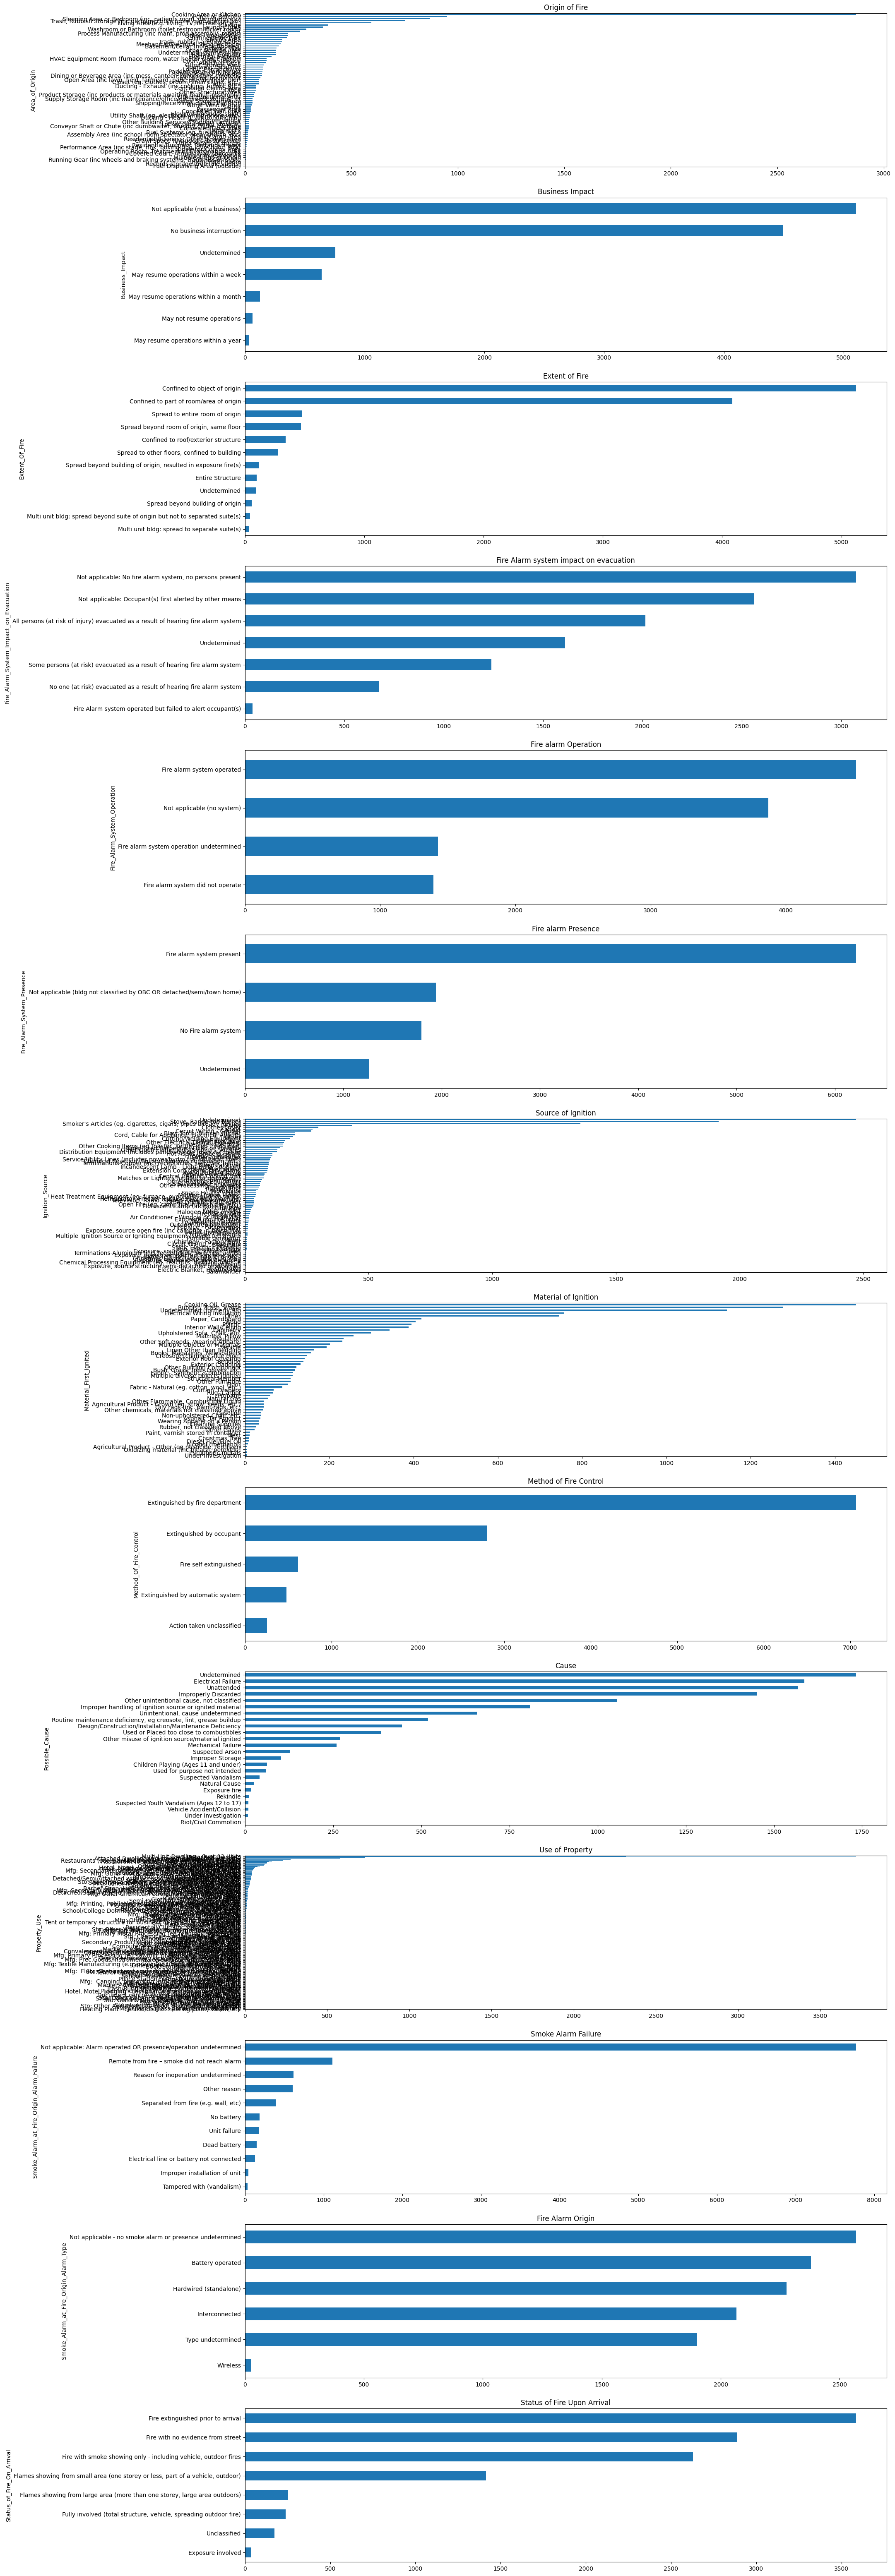

In [9]:
fig, axes = plt.subplots(14, 1, figsize=(20,80))

axes[0].set_title('Origin of Fire')
df['Area_of_Origin'].value_counts(ascending=True).plot(kind='barh', ax=axes[0])

axes[1].set_title('Business Impact')
df['Business_Impact'].value_counts(ascending=True).plot(kind='barh', ax=axes[1])

axes[2].set_title('Extent of Fire')
df['Extent_Of_Fire'].value_counts(ascending=True).plot(kind='barh', ax=axes[2])

axes[3].set_title('Fire Alarm system impact on evacuation')
df['Fire_Alarm_System_Impact_on_Evacuation'].value_counts(ascending=True).plot(kind='barh', ax=axes[3])

axes[4].set_title('Fire alarm Operation')
df['Fire_Alarm_System_Operation'].value_counts(ascending=True).plot(kind='barh', ax=axes[4])

axes[5].set_title('Fire alarm Presence')
df['Fire_Alarm_System_Presence'].value_counts(ascending=True).plot(kind='barh', ax=axes[5])

axes[6].set_title('Source of Ignition')
df['Ignition_Source'].value_counts(ascending=True).plot(kind='barh', ax=axes[6])

axes[7].set_title('Material of Ignition')
df['Material_First_Ignited'].value_counts(ascending=True).plot(kind='barh', ax=axes[7])

axes[8].set_title('Method of Fire Control')
df['Method_Of_Fire_Control'].value_counts(ascending=True).plot(kind='barh', ax=axes[8])

axes[9].set_title('Cause')
df['Possible_Cause'].value_counts(ascending=True).plot(kind='barh', ax=axes[9])

axes[10].set_title('Use of Property')
df['Property_Use'].value_counts(ascending=True).plot(kind='barh', ax=axes[10])

axes[11].set_title('Smoke Alarm Failure')
df['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts(ascending=True).plot(kind='barh', ax=axes[11])

axes[12].set_title('Fire Alarm Origin')
df['Smoke_Alarm_at_Fire_Origin_Alarm_Type'].value_counts(ascending=True).plot(kind='barh', ax=axes[12])

axes[13].set_title('Status of Fire Upon Arrival')
df['Status_of_Fire_On_Arrival'].value_counts(ascending=True).plot(kind='barh', ax=axes[13])

In [10]:
#4 of the columns clearly have far too many categories from the above plot.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['Area_of_Origin'].value_counts())

Area_of_Origin
Cooking Area or Kitchen                                                 2870
Porch or Balcony                                                         950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)            868
Trash, Rubbish Storage (inc garbage chute room, garbage/industri         751
Living Area (e.g. living, TV, recreation, etc)                           594
Garage                                                                   392
Laundry Area                                                             365
Washroom or Bathroom (toilet,restroom/locker room)                       288
Roof                                                                     259
Process Manufacturing (inc manf, prod assembly, repair)                  201
Other - unclassified                                                     201
Chimney/Flue Pipe                                                        197
Engine Area                                                  

There is a small dropoff in values after **'Attached Deck'** where the remaining categories have at least close to 100 observations, This cutoff is arbitrary and a better cutoff might be possible with further analysis. I will group all categories with less observations than **'Attached Deck' as well as the 'Other - unclassified' category in a new 'Other' category**.

In [11]:
keep_origin = ['Cooking Area or Kitchen',
              'Porch or Balcony',
              'Sleeping Area or Bedroom (inc. patients room, dormitory, etc)',
              'Trash, Rubbish Storage (inc garbage chute room, garbage/industri',
              'Living Area (e.g. living, TV, recreation, etc)',
              'Garage',
              'Laundry Area',
              'Washroom or Bathroom (toilet,restroom/locker room)'
              'Roof',
              'Chimney/Flue Pipe',
              'Engine Area',
              'Trash, rubbish area (outside)',
              'Mechanical/Electrical Services Room',
              'Basement/cellar (not partitioned)',
              'Exterior Wall',
              'Other Outside Area',
              'Hallway, Corridor',
              'Electrical Systems',
              'HVAC Equipment Room (furnace room, water heater closet, boiler)',
              'Court, Patio, Terrace',
              'Attached Deck']

In [12]:
for i in df['Area_of_Origin']:
    if i not in keep_origin:
        df['Area_of_Origin'] = np.where((df.Area_of_Origin == i), 'Other', df.Area_of_Origin)

In [13]:
#The remaining categories¶
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['Area_of_Origin'].value_counts())

Area_of_Origin
Cooking Area or Kitchen                                             2870
Other                                                               2681
Porch or Balcony                                                     950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        868
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     751
Living Area (e.g. living, TV, recreation, etc)                       594
Garage                                                               392
Laundry Area                                                         365
Chimney/Flue Pipe                                                    197
Engine Area                                                          176
Trash, rubbish area (outside)                                        173
Mechanical/Electrical Services Room                                  169
Basement/cellar (not partitioned)                                    159
Exterior Wall                       

<Axes: ylabel='Area_of_Origin'>

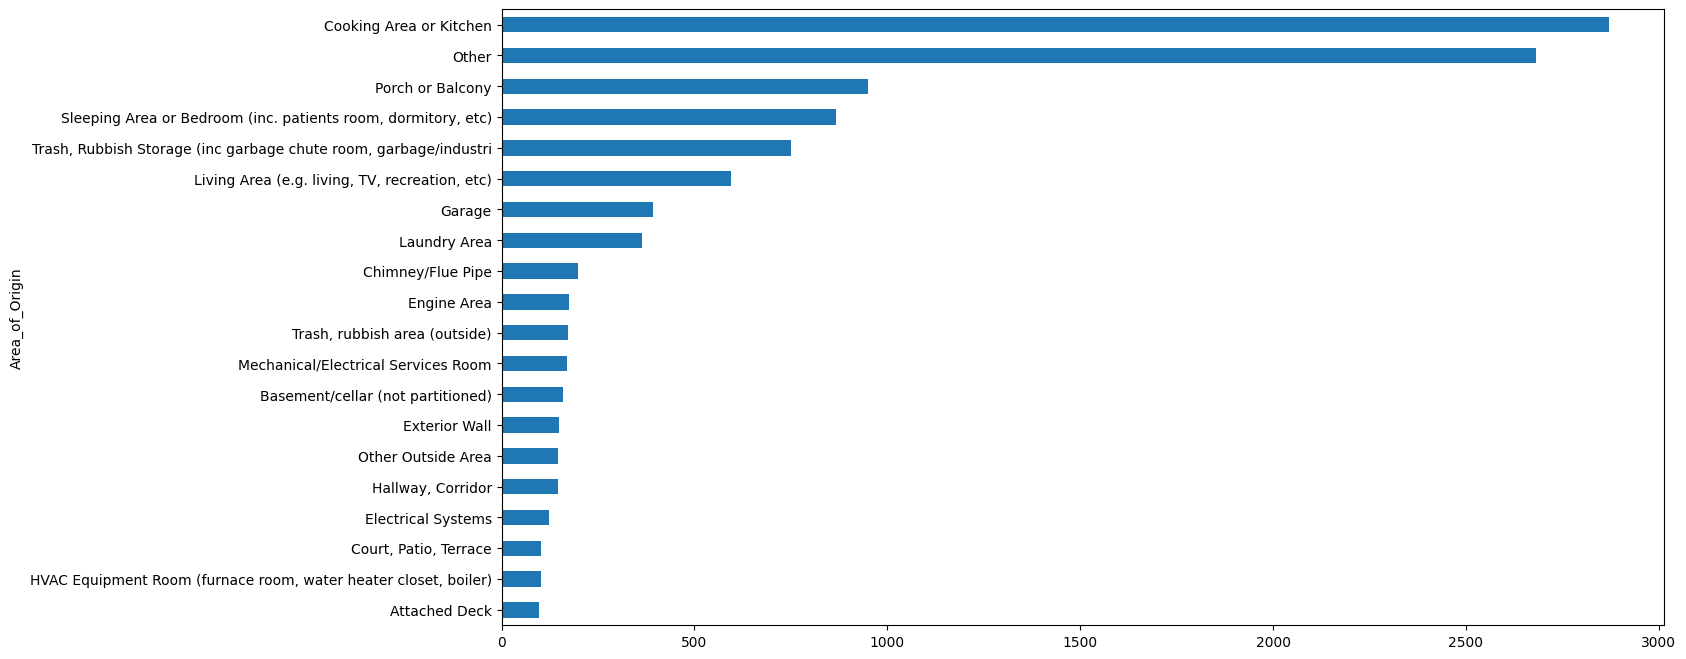

In [14]:
rcParams['figure.figsize'] = 15,8
df['Area_of_Origin'].value_counts(ascending=True).plot(kind='barh')

**This same process is repeated for the 'Ignition source', 'Material first ignited' and 'Property use' columns.**

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['Ignition_Source'].value_counts())

Ignition_Source
Undetermined                                                        2471
Stove, Range-top burner                                             1916
Smoker's Articles (eg. cigarettes, cigars, pipes already ignited    1356
Oven                                                                 432
Clothes Dryer                                                        297
Candle                                                               274
Circuit Wiring - Copper                                              268
Blow Torch, Bunsen Burner                                            203
Cord, Cable for Appliance, Electrical Articles                       202
Other                                                                194
Cutting/Welding Equipment                                            182
Other Electrical                                                     163
Other Electrical Distribution Item                                   158
Other Cooking Items (eg Toaster, Ke

In [16]:
keep_ignition = ['Undetermined',
                 'Stove, Range-top burner',
                 "Smoker's Articles (eg. cigarettes, cigars, pipes already ignited",
                 'Oven',
                 'Clothes Dryer',
                 'Candle',
                 'Circuit Wiring - Copper',
                 'Blow Torch, Bunsen Burner',
                 'Cord, Cable for Appliance, Electrical Articles',
                 'Cutting/Welding Equipment',
                 'Other Electrical',
                 'Other Electrical Distribution Item',
                 'Other Cooking Items (eg Toaster, Kettle, elec frying pan)',
                 'Vehicle - Electrical',
                 'Open Fired Barbeque - Fixed or Portable',
                 "Other Open Flame Tools/Smokers' Articles",
                 'Distribution Equipment (includes panel boards, fuses, circuit br',
                 'Hot Ashes, Embers, Spark',
                 'Fireplace - Masonry',
                 'Other Appliances',
                 'Service/Utility Lines (includes power/hydro transmission lines)',
                 'Chemical Reaction (eg. spontaneous combustion, etc.)',
                 'Terminations-Copper (incl receptacles, switches, lights)',
                 'Deep Fat Fryer',
                 'Other Mechanical',
                 'Incandescent Lamp - Light Bulb, Spotlight',
                 'Extension Cord, Temporary Wiring',
                 'Wood burning stove']

In [17]:
for i in df['Ignition_Source']:
    if i not in keep_ignition:
        df['Ignition_Source'] = np.where((df.Ignition_Source == i), 'Other', df.Ignition_Source)

<Axes: ylabel='Ignition_Source'>

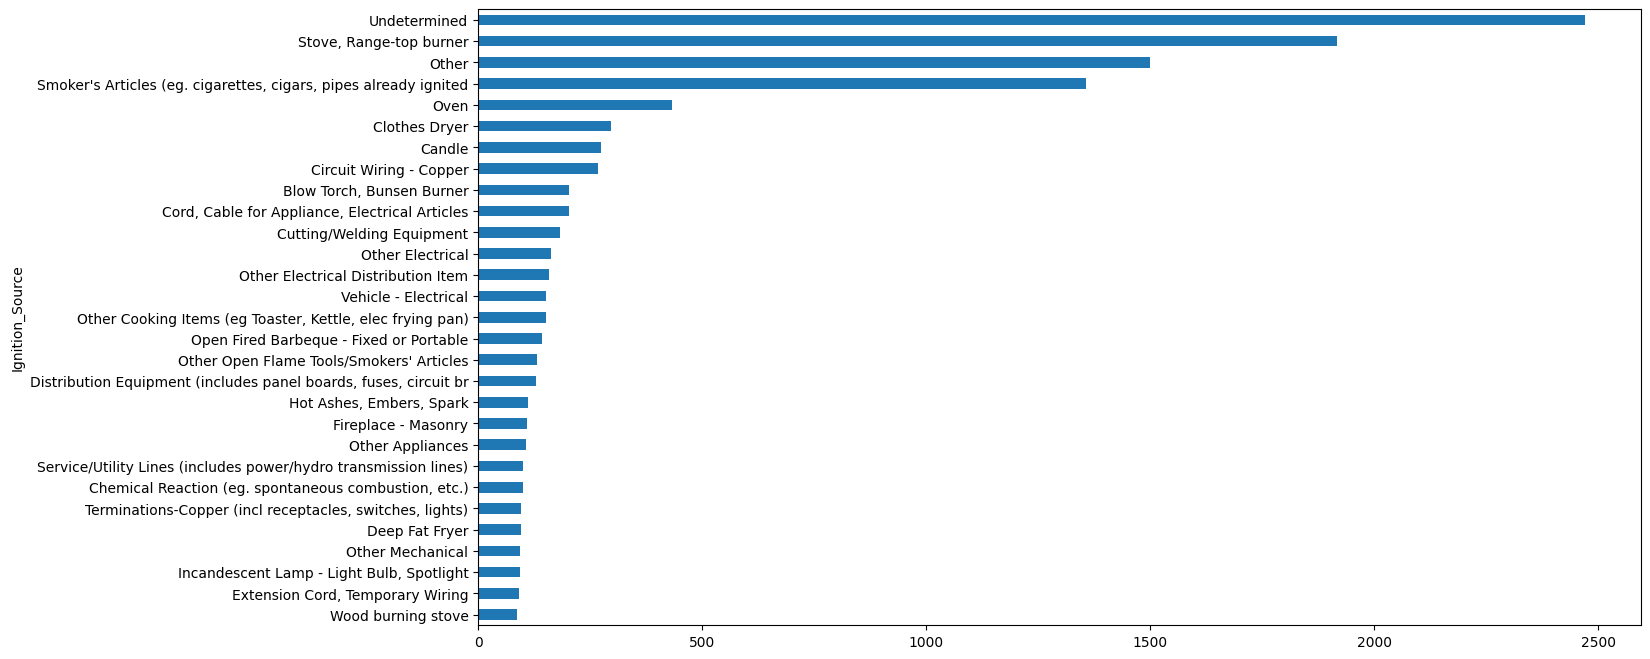

In [18]:
rcParams['figure.figsize'] = 15,8
df['Ignition_Source'].value_counts(ascending=True).plot(kind='barh')

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['Material_First_Ignited'].value_counts())

Material_First_Ignited
Cooking Oil, Grease                                        1450
Rubbish, Trash, Waste                                      1276
Undetermined (formerly 98)                                 1144
Electrical Wiring Insulation                                757
Other                                                       745
Paper, Cardboard                                            419
Wood                                                        405
Plastic                                                     395
Interior Wall/Ceiling                                       388
Cabinetry                                                   343
Upholstered Sofa, Chair, etc.                               299
Mattress, Pillow                                            258
Insulation                                                  234
Other Soft Goods, Wearing Apparel                           231
Multiple Objects or Materials                               202
Vehicle          

In [20]:
keep_material = ['Cooking Oil, Grease',
                 'Rubbish, Trash, Waste',
                 'Undetermined (formerly 98)',
                 'Electrical Wiring Insulation',
                 'Paper, Cardboard',
                 'Wood',
                 'Plastic',
                 'Interior Wall/Ceiling',
                 'Cabinetry',
                 'Upholstered Sofa, Chair, etc.',
                 'Mattress, Pillow',
                 'Insulation',
                 'Other Soft Goods, Wearing Apparel',
                 'Multiple Objects or Materials',
                 'Vehicle',
                 'Linen Other than Bedding',
                 'Books, Magazines, Newspapers',
                 'Creosote (chimney, flue pipe)',
                 'Exterior Roof Covering',
                 'Bedding',
                 'Exterior Cladding',
                 'Other Building Component',
                 'Bush, Grass, Tree, Leaves, etc.',
                 'Fabric - Synthetic, Combination',
                 'Multiple diverse objects ignited',
                 'Structural Member',
                 'Other Furniture',
                 'Floor',
                 'Fabric - Natural (eg. cotton, wool, etc.)']

In [21]:
for i in df['Material_First_Ignited']:
    if i not in keep_material:
        df['Material_First_Ignited'] = np.where((df.Material_First_Ignited == i), 'Other', df.Material_First_Ignited)

<Axes: ylabel='Material_First_Ignited'>

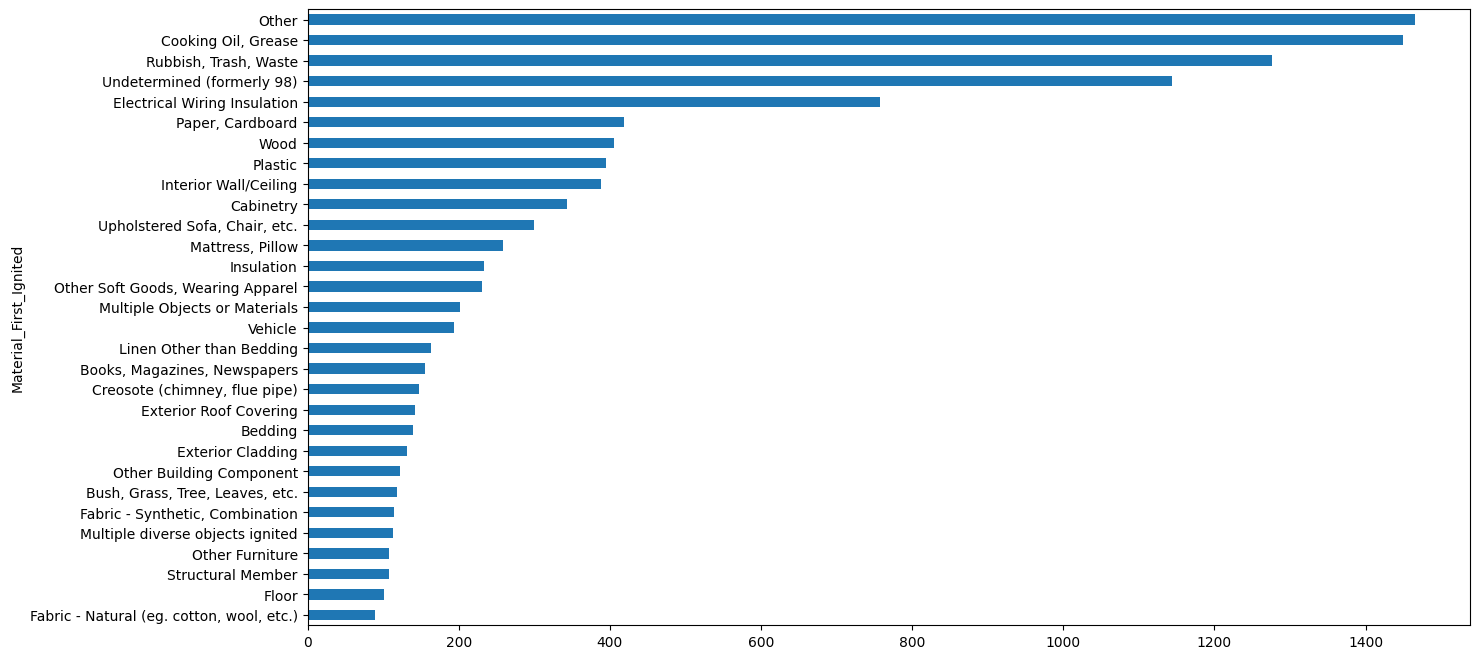

In [22]:
df['Material_First_Ignited'].value_counts(ascending=True).plot(kind='barh')

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['Property_Use'].value_counts())

Property_Use
Multi-Unit Dwelling - Over 12 Units                                      3719
Detached Dwelling                                                        2318
Semi-Detached Dwelling                                                    729
Attached Dwelling (eg. rowhouse, townhouse, etc.)                         579
Multi-Unit Dwelling - 2 to 6 Units                                        281
Apartment, Flat, Tenement with Business                                   277
Restaurants (occupant load greater than 30 persons, licensed)             229
Restaurant (occupant load less than 30 persons)                           164
Multi-Unit Dwelling - 7 to 12 Units                                       145
Detached Garage                                                           135
Subway Station                                                            132
Rooming/Boarding/Lodging House                                            121
General Business Office                            

In [24]:
keep_use = ['Multi-Unit Dwelling - Over 12 Units',
            'Detached Dwelling',
            'Semi-Detached Dwelling',
            'Attached Dwelling (eg. rowhouse, townhouse, etc.)',
            'Multi-Unit Dwelling - 2 to 6 Units',
            'Apartment, Flat, Tenement with Business',
            'Restaurants (occupant load greater than 30 persons, licensed)',
            'Restaurant (occupant load less than 30 persons)',
            'Multi-Unit Dwelling - 7 to 12 Units',
            'Detached Garage',
            'Subway Station',
            'Rooming/Boarding/Lodging House',
            'General Business Office',
            'Motor Vehicle Repair Garage']

In [25]:
for i in df['Property_Use']:
    if i not in keep_use:
        df['Property_Use'] = np.where((df.Property_Use == i), 'Other', df.Property_Use)

<Axes: ylabel='Property_Use'>

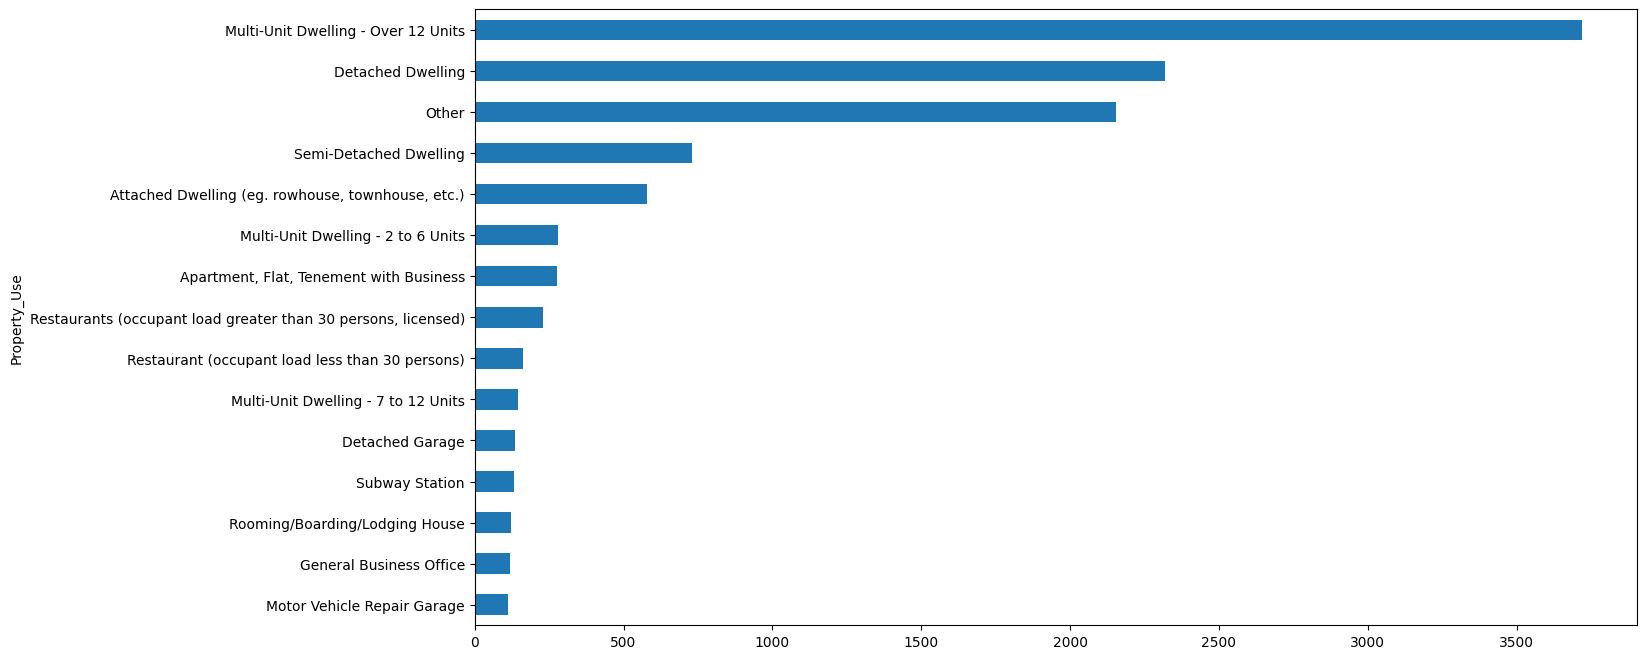

In [26]:
df['Property_Use'].value_counts(ascending=True).plot(kind='barh')

# ***The new countplots are much easier to read and the statistical conclusions will be more significant.***

<Axes: title={'center': 'Status of Fire Upon Arrival'}, ylabel='Status_of_Fire_On_Arrival'>

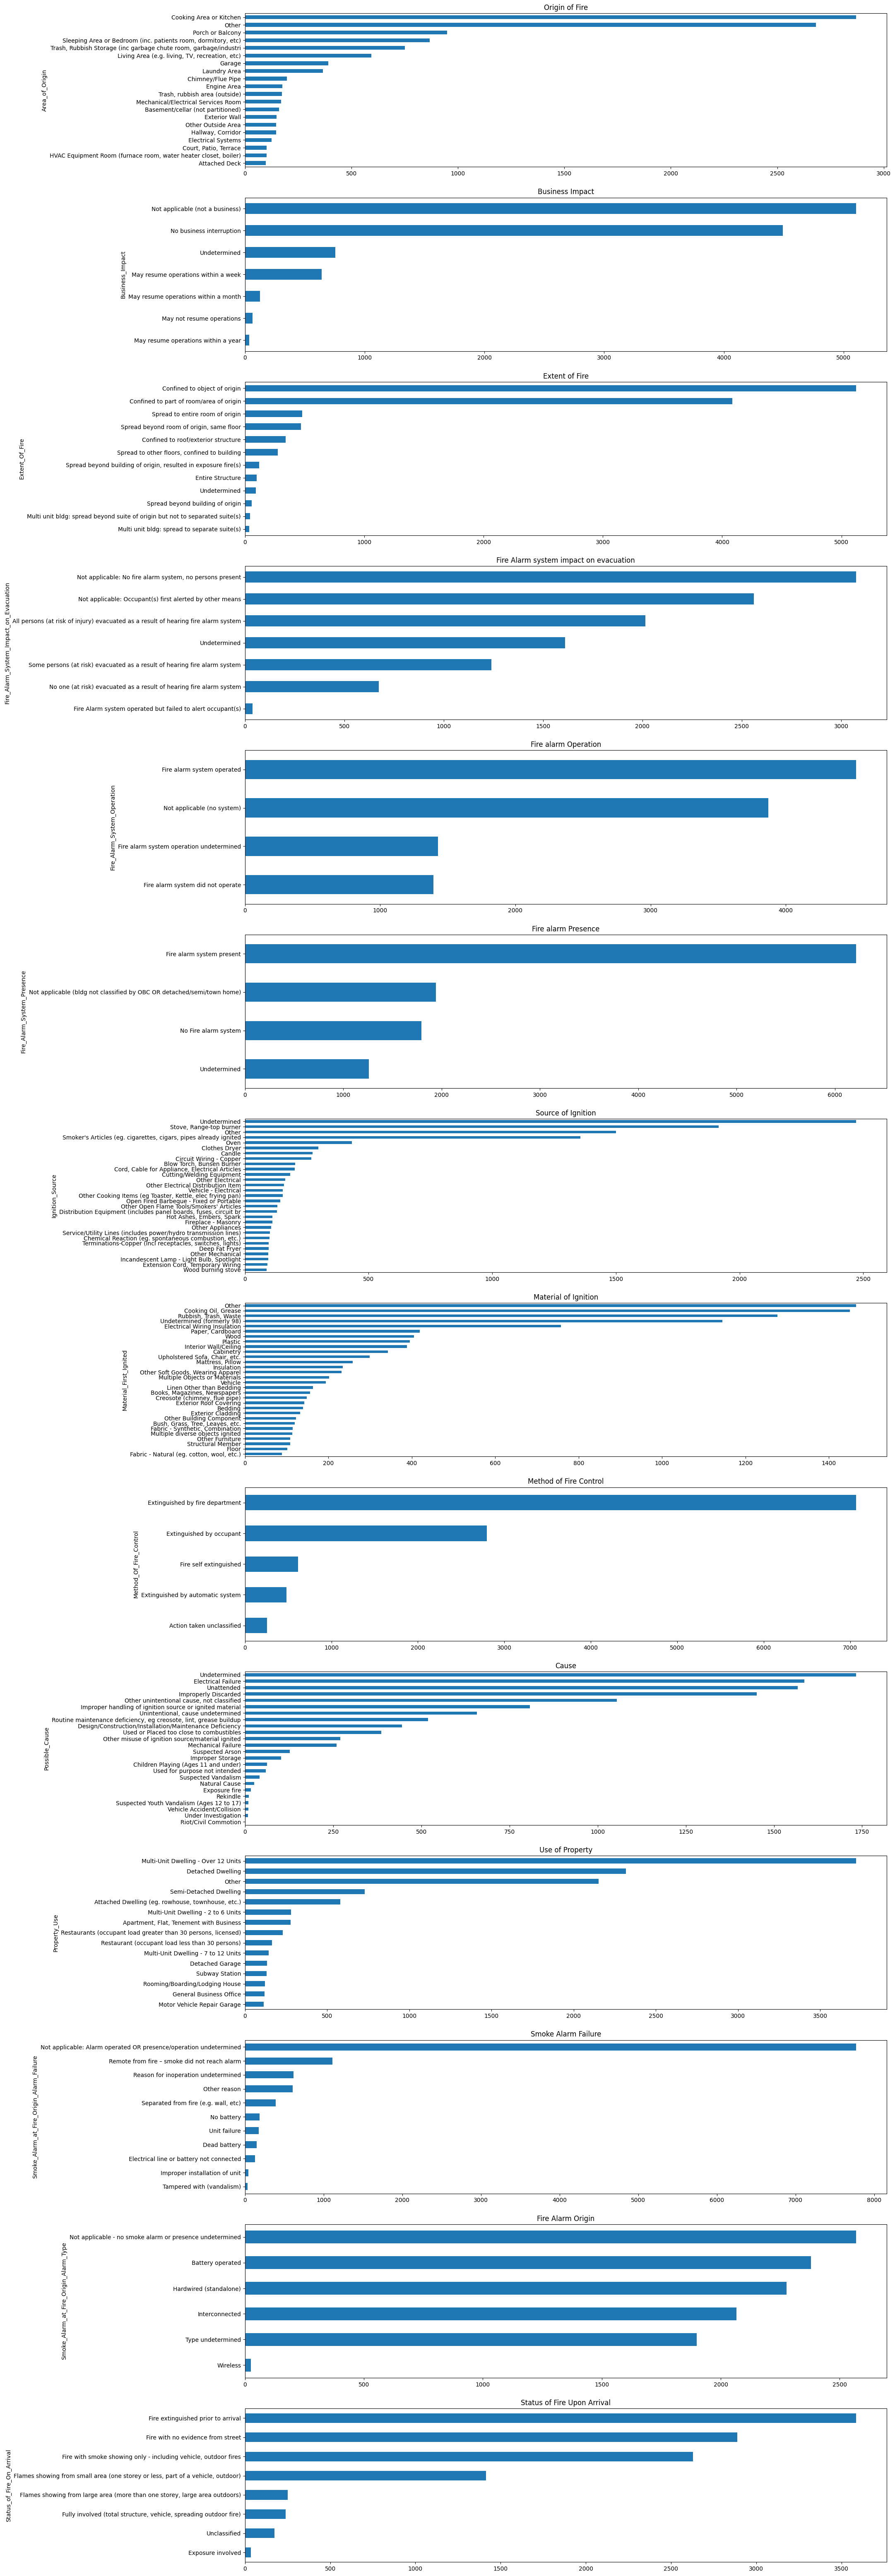

In [27]:
fig, axes = plt.subplots(14, 1, figsize=(20,80))

axes[0].set_title('Origin of Fire')
df['Area_of_Origin'].value_counts(ascending=True).plot(kind='barh', ax=axes[0])

axes[1].set_title('Business Impact')
df['Business_Impact'].value_counts(ascending=True).plot(kind='barh', ax=axes[1])

axes[2].set_title('Extent of Fire')
df['Extent_Of_Fire'].value_counts(ascending=True).plot(kind='barh', ax=axes[2])

axes[3].set_title('Fire Alarm system impact on evacuation')
df['Fire_Alarm_System_Impact_on_Evacuation'].value_counts(ascending=True).plot(kind='barh', ax=axes[3])

axes[4].set_title('Fire alarm Operation')
df['Fire_Alarm_System_Operation'].value_counts(ascending=True).plot(kind='barh', ax=axes[4])

axes[5].set_title('Fire alarm Presence')
df['Fire_Alarm_System_Presence'].value_counts(ascending=True).plot(kind='barh', ax=axes[5])

axes[6].set_title('Source of Ignition')
df['Ignition_Source'].value_counts(ascending=True).plot(kind='barh', ax=axes[6])

axes[7].set_title('Material of Ignition')
df['Material_First_Ignited'].value_counts(ascending=True).plot(kind='barh', ax=axes[7])

axes[8].set_title('Method of Fire Control')
df['Method_Of_Fire_Control'].value_counts(ascending=True).plot(kind='barh', ax=axes[8])

axes[9].set_title('Cause')
df['Possible_Cause'].value_counts(ascending=True).plot(kind='barh', ax=axes[9])

axes[10].set_title('Use of Property')
df['Property_Use'].value_counts(ascending=True).plot(kind='barh', ax=axes[10])

axes[11].set_title('Smoke Alarm Failure')
df['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts(ascending=True).plot(kind='barh', ax=axes[11])

axes[12].set_title('Fire Alarm Origin')
df['Smoke_Alarm_at_Fire_Origin_Alarm_Type'].value_counts(ascending=True).plot(kind='barh', ax=axes[12])

axes[13].set_title('Status of Fire Upon Arrival')
df['Status_of_Fire_On_Arrival'].value_counts(ascending=True).plot(kind='barh', ax=axes[13])

### **Continuous Data**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Frequency')

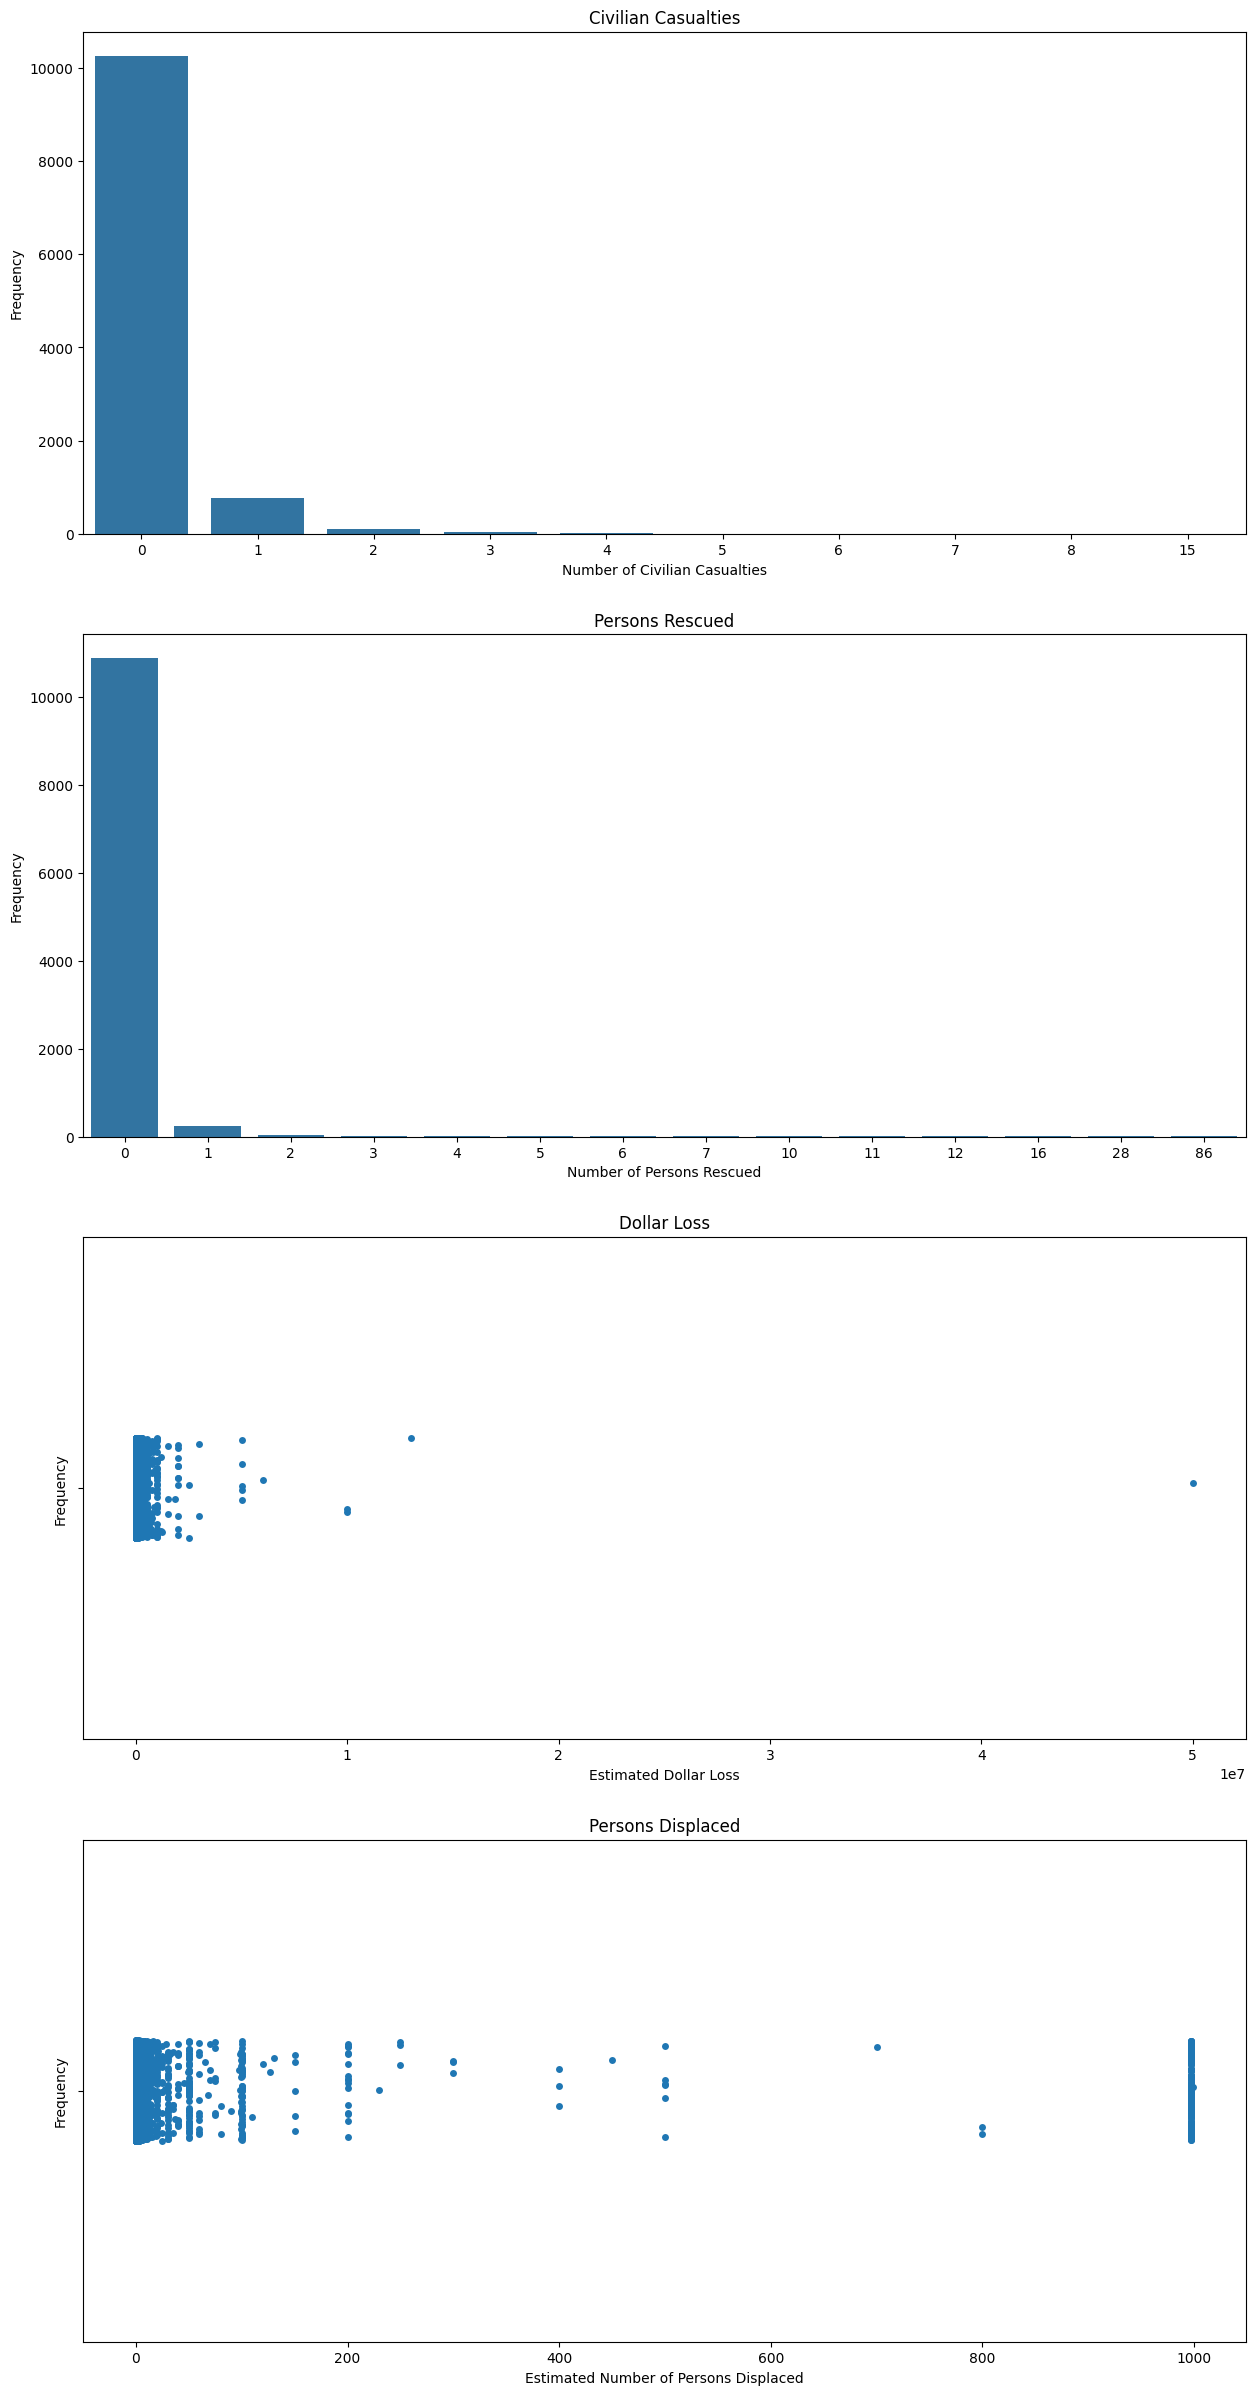

In [28]:
fig, axes = plt.subplots(4, 1, figsize=(15,30))

axes[0].set_title('Civilian Casualties')
sns.countplot(x=df['Civilian_Casualties'], ax=axes[0])
axes[0].set_xlabel('Number of Civilian Casualties')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Persons Rescued')
sns.countplot(x=df['Count_of_Persons_Rescued'], ax=axes[1])
axes[1].set_xlabel('Number of Persons Rescued')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Dollar Loss')
sns.stripplot(x=df['Estimated_Dollar_Loss'], ax=axes[2])
axes[2].set_xlabel('Estimated Dollar Loss')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Persons Displaced')
sns.stripplot(x=df['Estimated_Number_Of_Persons_Displaced'], ax=axes[3])
axes[3].set_xlabel('Estimated Number of Persons Displaced')
axes[3].set_ylabel('Frequency')

Since most data has a value of 0 the plots don't show the values very well. To show all the values the following plots exclude all 0 values.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Frequency')

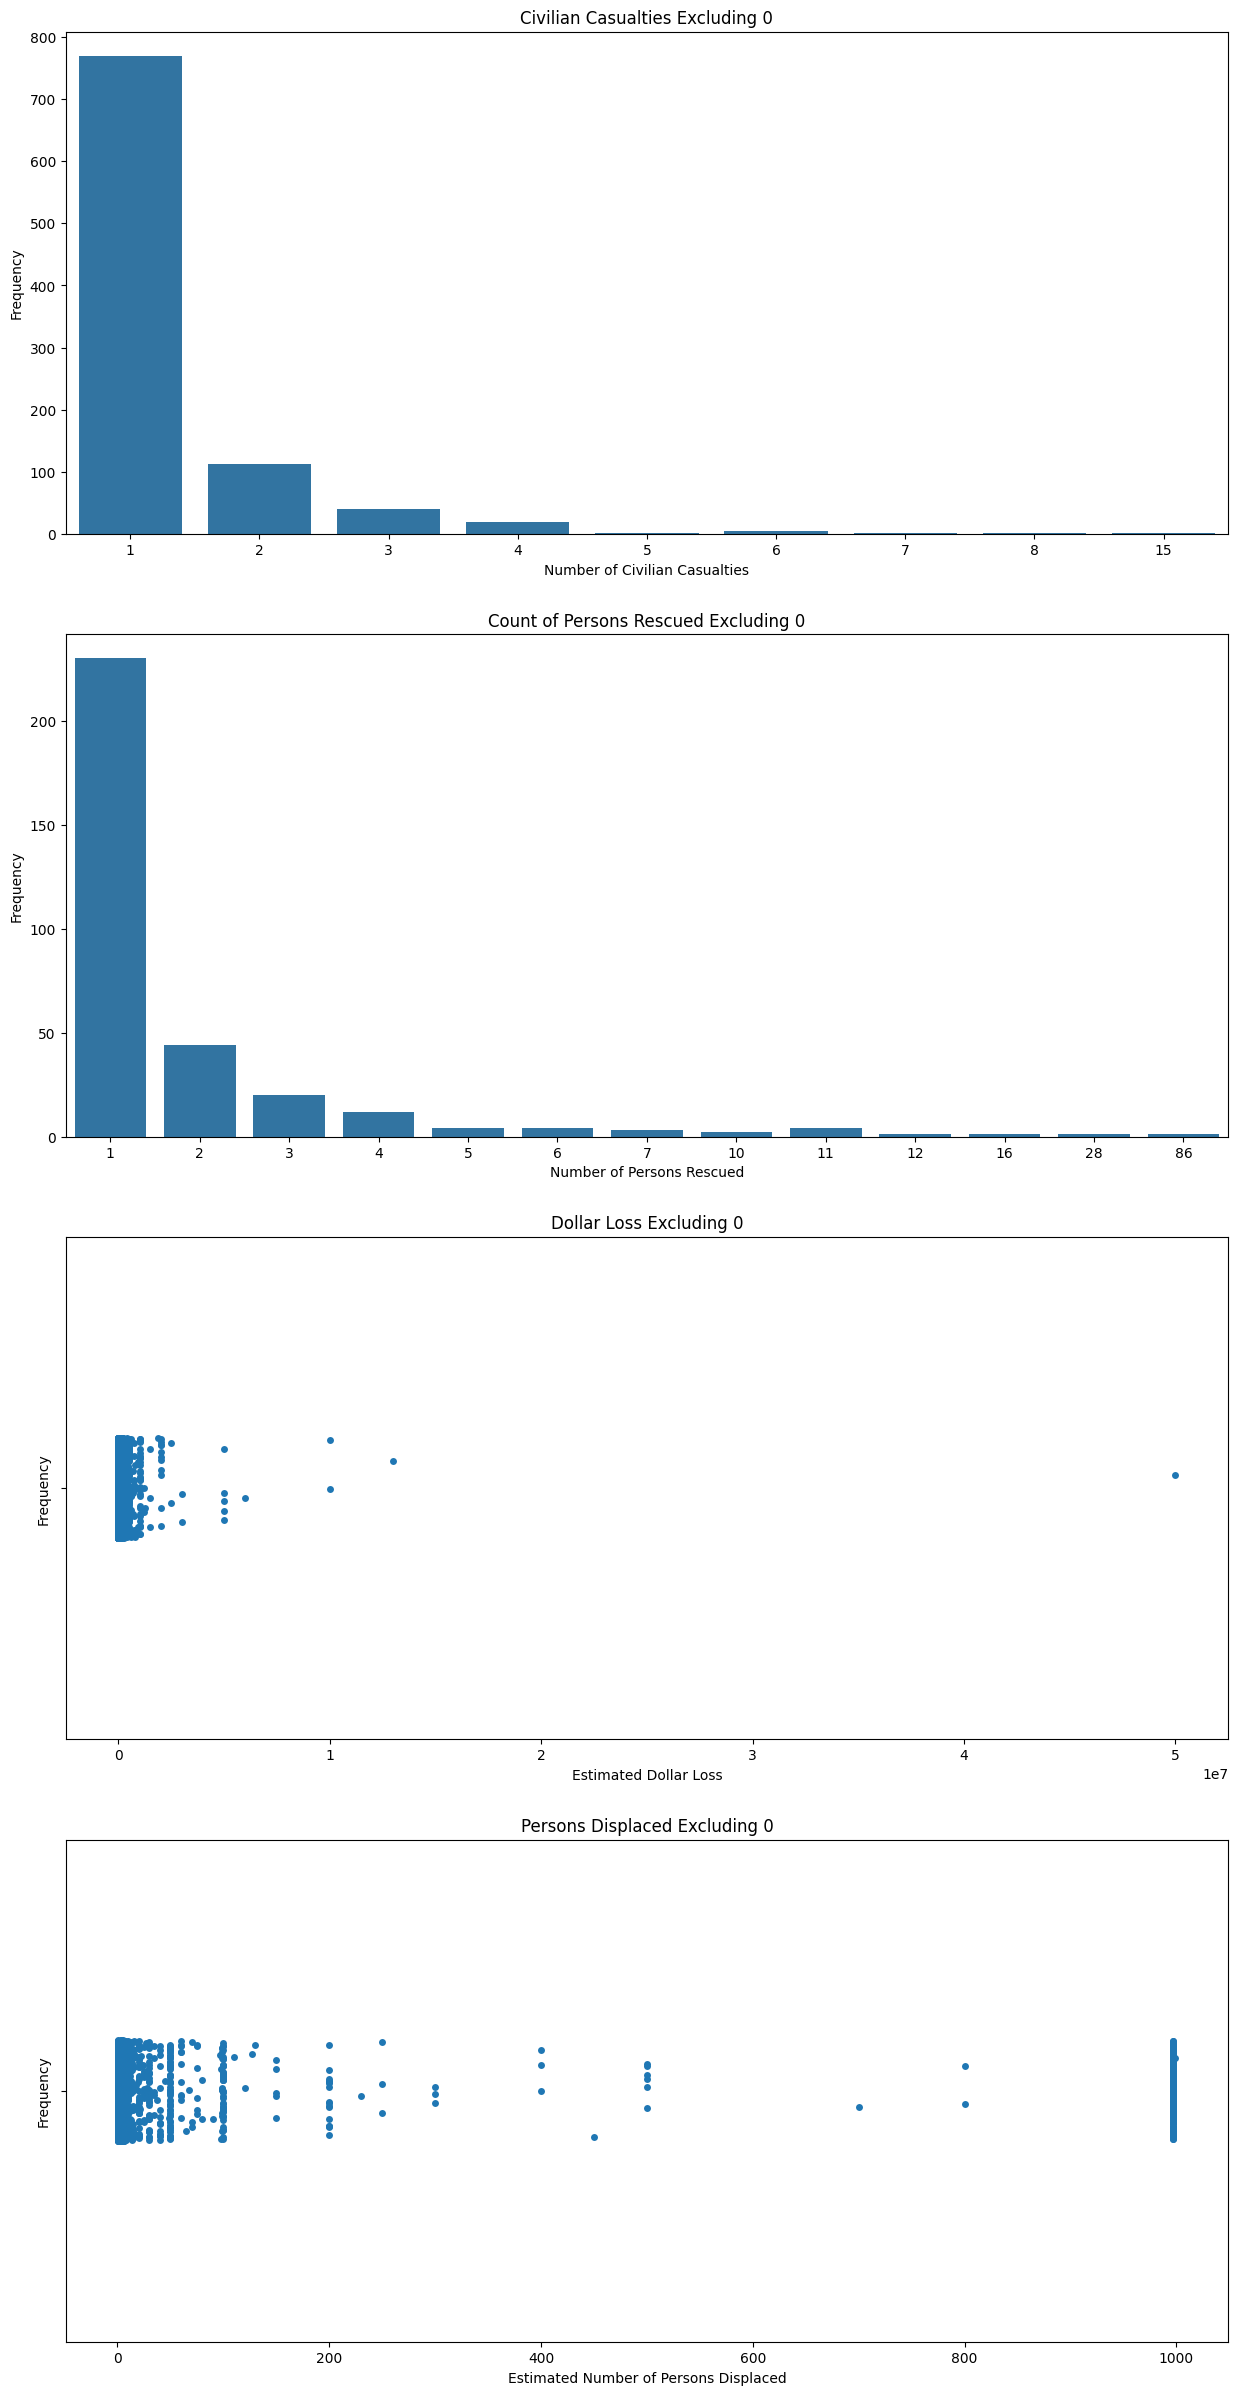

In [29]:
fig, axes = plt.subplots(4, 1, figsize=(15,30))

axes[0].set_title('Civilian Casualties Excluding 0')
casualties_nozero = df[(df.Civilian_Casualties > 0)]
sns.countplot(x=casualties_nozero['Civilian_Casualties'], ax=axes[0])
axes[0].set_xlabel('Number of Civilian Casualties')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Count of Persons Rescued Excluding 0')
rescued_nozero = df[(df.Count_of_Persons_Rescued > 0)]
sns.countplot(x=rescued_nozero['Count_of_Persons_Rescued'], ax=axes[1])
axes[1].set_xlabel('Number of Persons Rescued')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Dollar Loss Excluding 0')
loss_nozero = df[(df.Estimated_Dollar_Loss > 0)]
sns.stripplot(x=loss_nozero['Estimated_Dollar_Loss'], ax=axes[2])
axes[2].set_xlabel('Estimated Dollar Loss')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Persons Displaced Excluding 0')
displaced_nozero = df[(df.Estimated_Number_Of_Persons_Displaced > 0)]
sns.stripplot(x=displaced_nozero['Estimated_Number_Of_Persons_Displaced'], ax=axes[3])
axes[3].set_xlabel('Estimated Number of Persons Displaced')
axes[3].set_ylabel('Frequency')

In the persons displaced plot there seems to be a lot of values around 1000 while a majority of other values vall under 200, this is strange.

In [30]:
len(df[(df.Estimated_Number_Of_Persons_Displaced > 900)])

157

All of these values are exactly 997. there seems to be no relation between civilian casualties, persons rescued, dollar loss and persons displaced when persons displaced is 997, this value appears to be a placeholder or unknown category.

In [31]:
df = df[(df.Estimated_Dollar_Loss < 40000000) & (df.Estimated_Number_Of_Persons_Displaced < 900)]

These strange values are removed as well as one massive outlier in the dollar loss column

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Frequency')

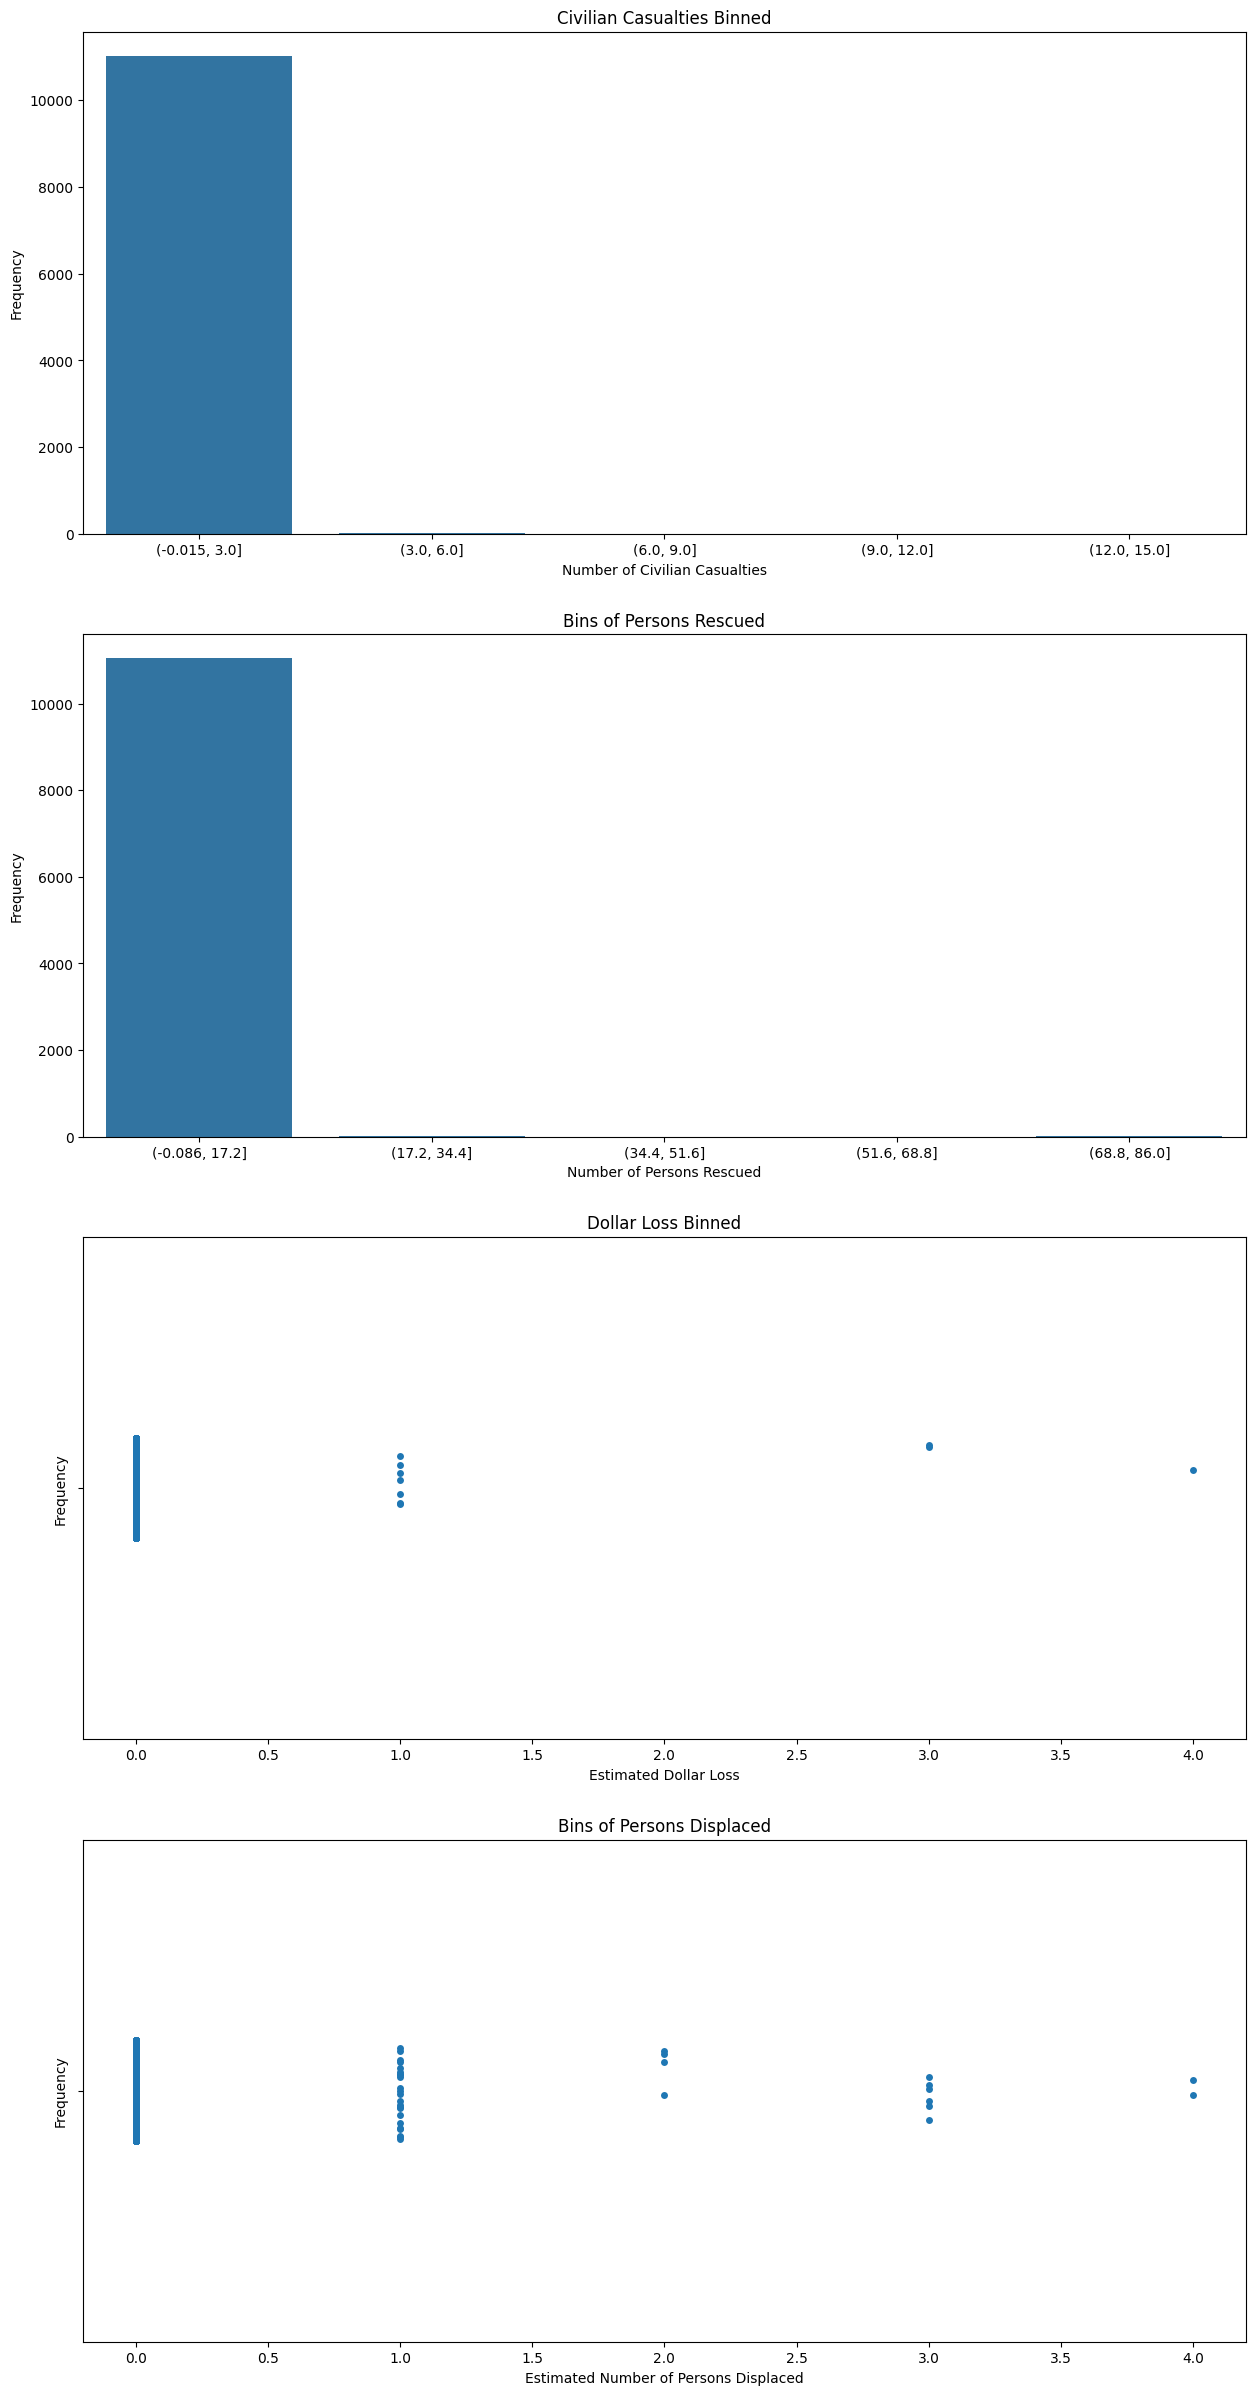

In [34]:
fig, axes = plt.subplots(4, 1, figsize=(15,30))

axes[0].set_title('Civilian Casualties Binned')
casualties_binned = pd.cut(df['Civilian_Casualties'], bins=5)
sns.countplot(x=casualties_binned, ax=axes[0])
axes[0].set_xlabel('Number of Civilian Casualties')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Bins of Persons Rescued')
rescued_binned = pd.cut(df['Count_of_Persons_Rescued'], bins=5)
sns.countplot(x=rescued_binned, ax=axes[1])
axes[1].set_xlabel('Number of Persons Rescued')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Dollar Loss Binned')
loss_binned = pd.cut(df['Estimated_Dollar_Loss'], bins=5)
loss_codes = loss_binned.astype('category').cat.codes
sns.stripplot(x=loss_codes, ax=axes[2])
axes[2].set_xlabel('Estimated Dollar Loss')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Bins of Persons Displaced')
displaced_binned = pd.cut(df['Estimated_Number_Of_Persons_Displaced'], bins=5)
displaced_codes = displaced_binned.astype('category').cat.codes
sns.stripplot(x=displaced_codes, ax=axes[3])
axes[3].set_xlabel('Estimated Number of Persons Displaced')
axes[3].set_ylabel('Frequency')

## **Discrete Data**

<Axes: title={'center': 'Station Area of Incident'}, xlabel='Incident_Ward', ylabel='count'>

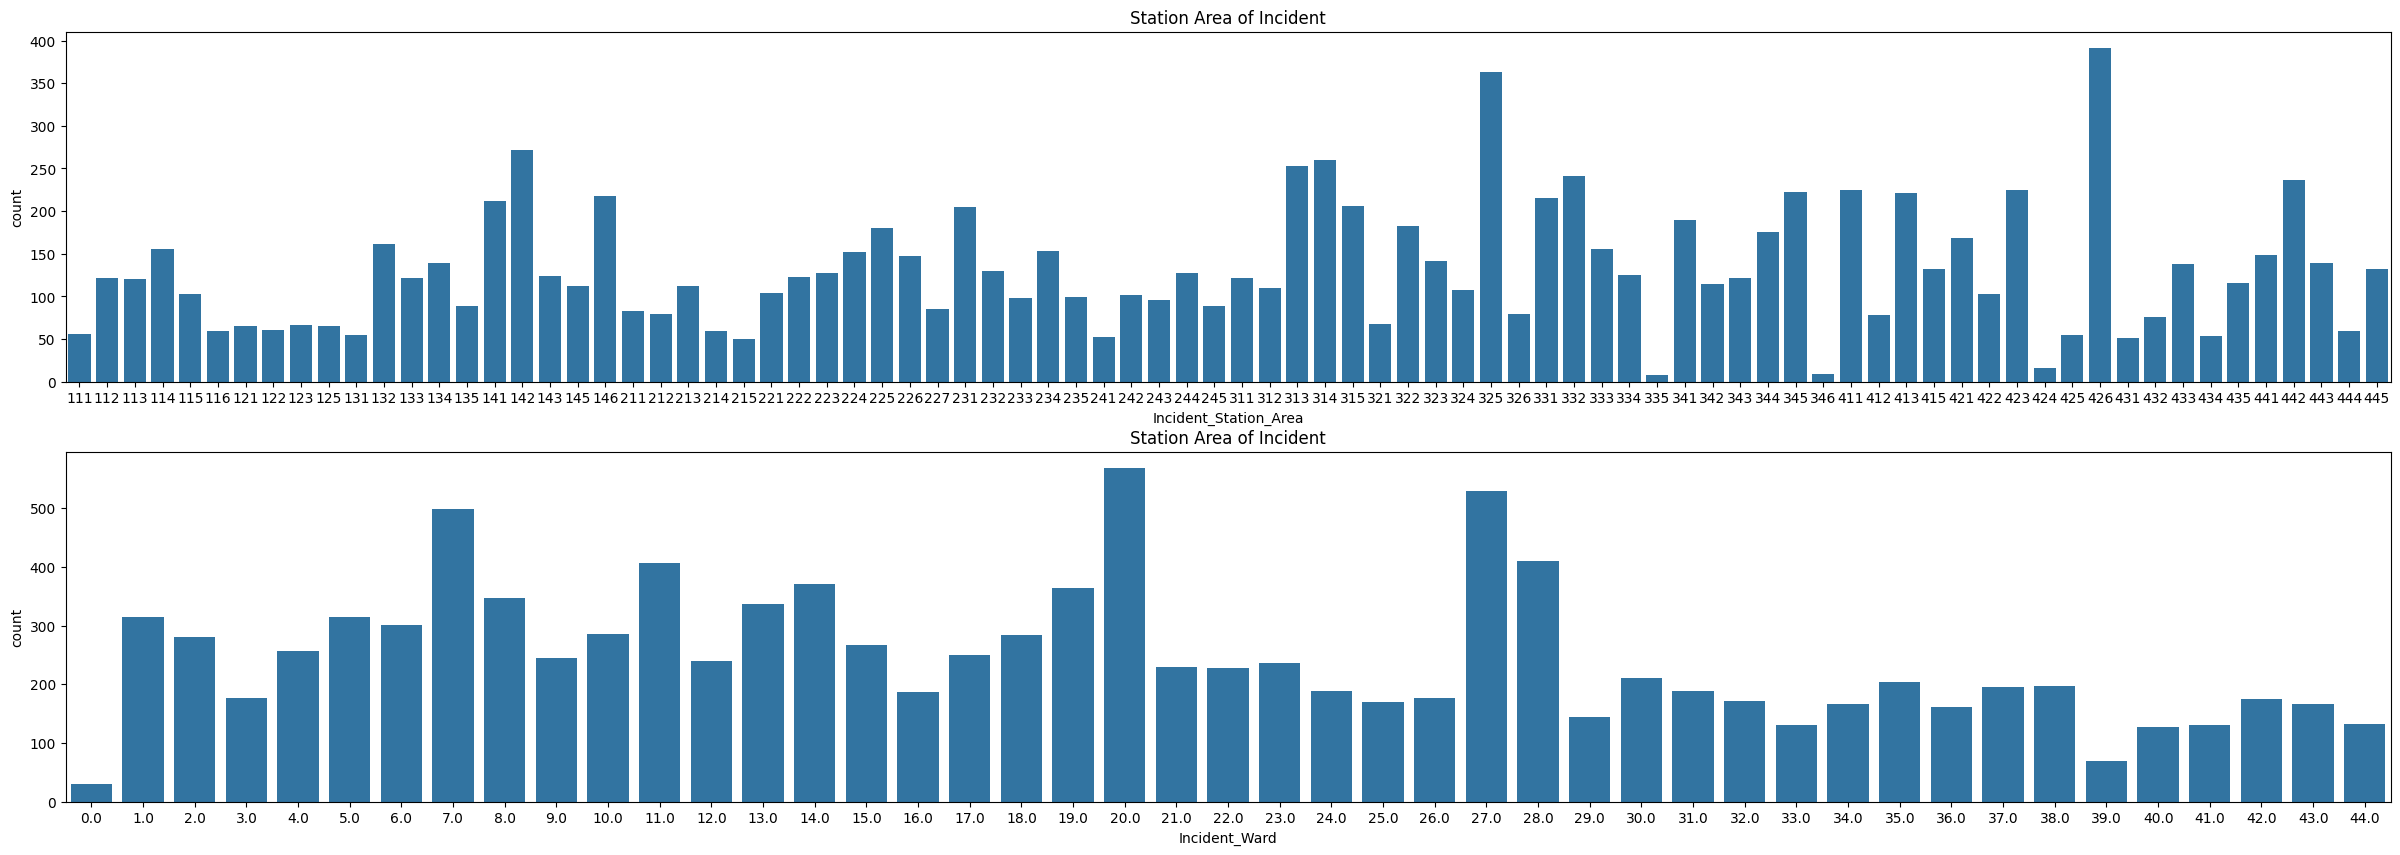

In [35]:
fig, axes = plt.subplots(2,1, figsize=(30,10))

axes[0].set_title('Station Area of Incident')
sns.countplot(data=df, x='Incident_Station_Area', ax=axes[0])

axes[1].set_title('Station Area of Incident')
sns.countplot(data=df, x='Incident_Ward', ax=axes[1])

## **Feature Engineering**

By using the timestamp columns some additional features can be engineered.

In [36]:
# Year month and day of the week (0-6)
df['Year'] = pd.DatetimeIndex(df['Ext_agent_app_or_defer_time']).year
df['Month'] = pd.DatetimeIndex(df['Ext_agent_app_or_defer_time']).month
df['Day_of_Week'] = pd.DatetimeIndex(df['Ext_agent_app_or_defer_time']).dayofweek

# Time of day(morning, afternoon, etc..)
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
df['Part_of_Day'] = pd.cut(pd.DatetimeIndex(df['Ext_agent_app_or_defer_time']).hour, bins=b, labels=l, include_lowest=True)

# Reaction time, time it took to extuinguish and the total time spent at the incident
df['Reaction_time_minutes'] = round((df.TFS_Arrival_Time - df.TFS_Alarm_Time).dt.total_seconds()/60, 2)
df['Extinguish_time_minutes'] = round((df.Fire_Under_Control_Time - df.TFS_Arrival_Time).dt.total_seconds()/60, 2)
df['Time_spent_minutes'] = round((df.Last_TFS_Unit_Clear_Time - df.TFS_Arrival_Time).dt.total_seconds()/60, 2)

df[['Ext_agent_app_or_defer_time', 'Year', 'Month', 'Day_of_Week', 'Part_of_Day',
    'Reaction_time_minutes', 'Extinguish_time_minutes', 'Time_spent_minutes']].head()

Ext_agent_app_or_defer_time  Year  Month  Day_of_Week    Part_of_Day  \
0         2018-08-24 17:06:26  2018      8            4        Evening   
1         2018-11-24 07:19:00  2018     11            5  Early Morning   
2         2017-02-09 18:02:13  2017      2            3        Evening   
3         2012-10-30 00:52:04  2012     10            1     Late Night   
4         2018-07-08 04:35:00  2018      7            6     Late Night   

   Reaction_time_minutes  Extinguish_time_minutes  Time_spent_minutes  
0                   4.55                    12.32               48.57  
1                   5.18                     4.62              330.97  
2                   3.70                    47.53              347.73  
3                   2.95                    43.83             3825.55  
4                   5.07                    24.57              750.22

<Axes: xlabel='Part_of_Day', ylabel='count'>

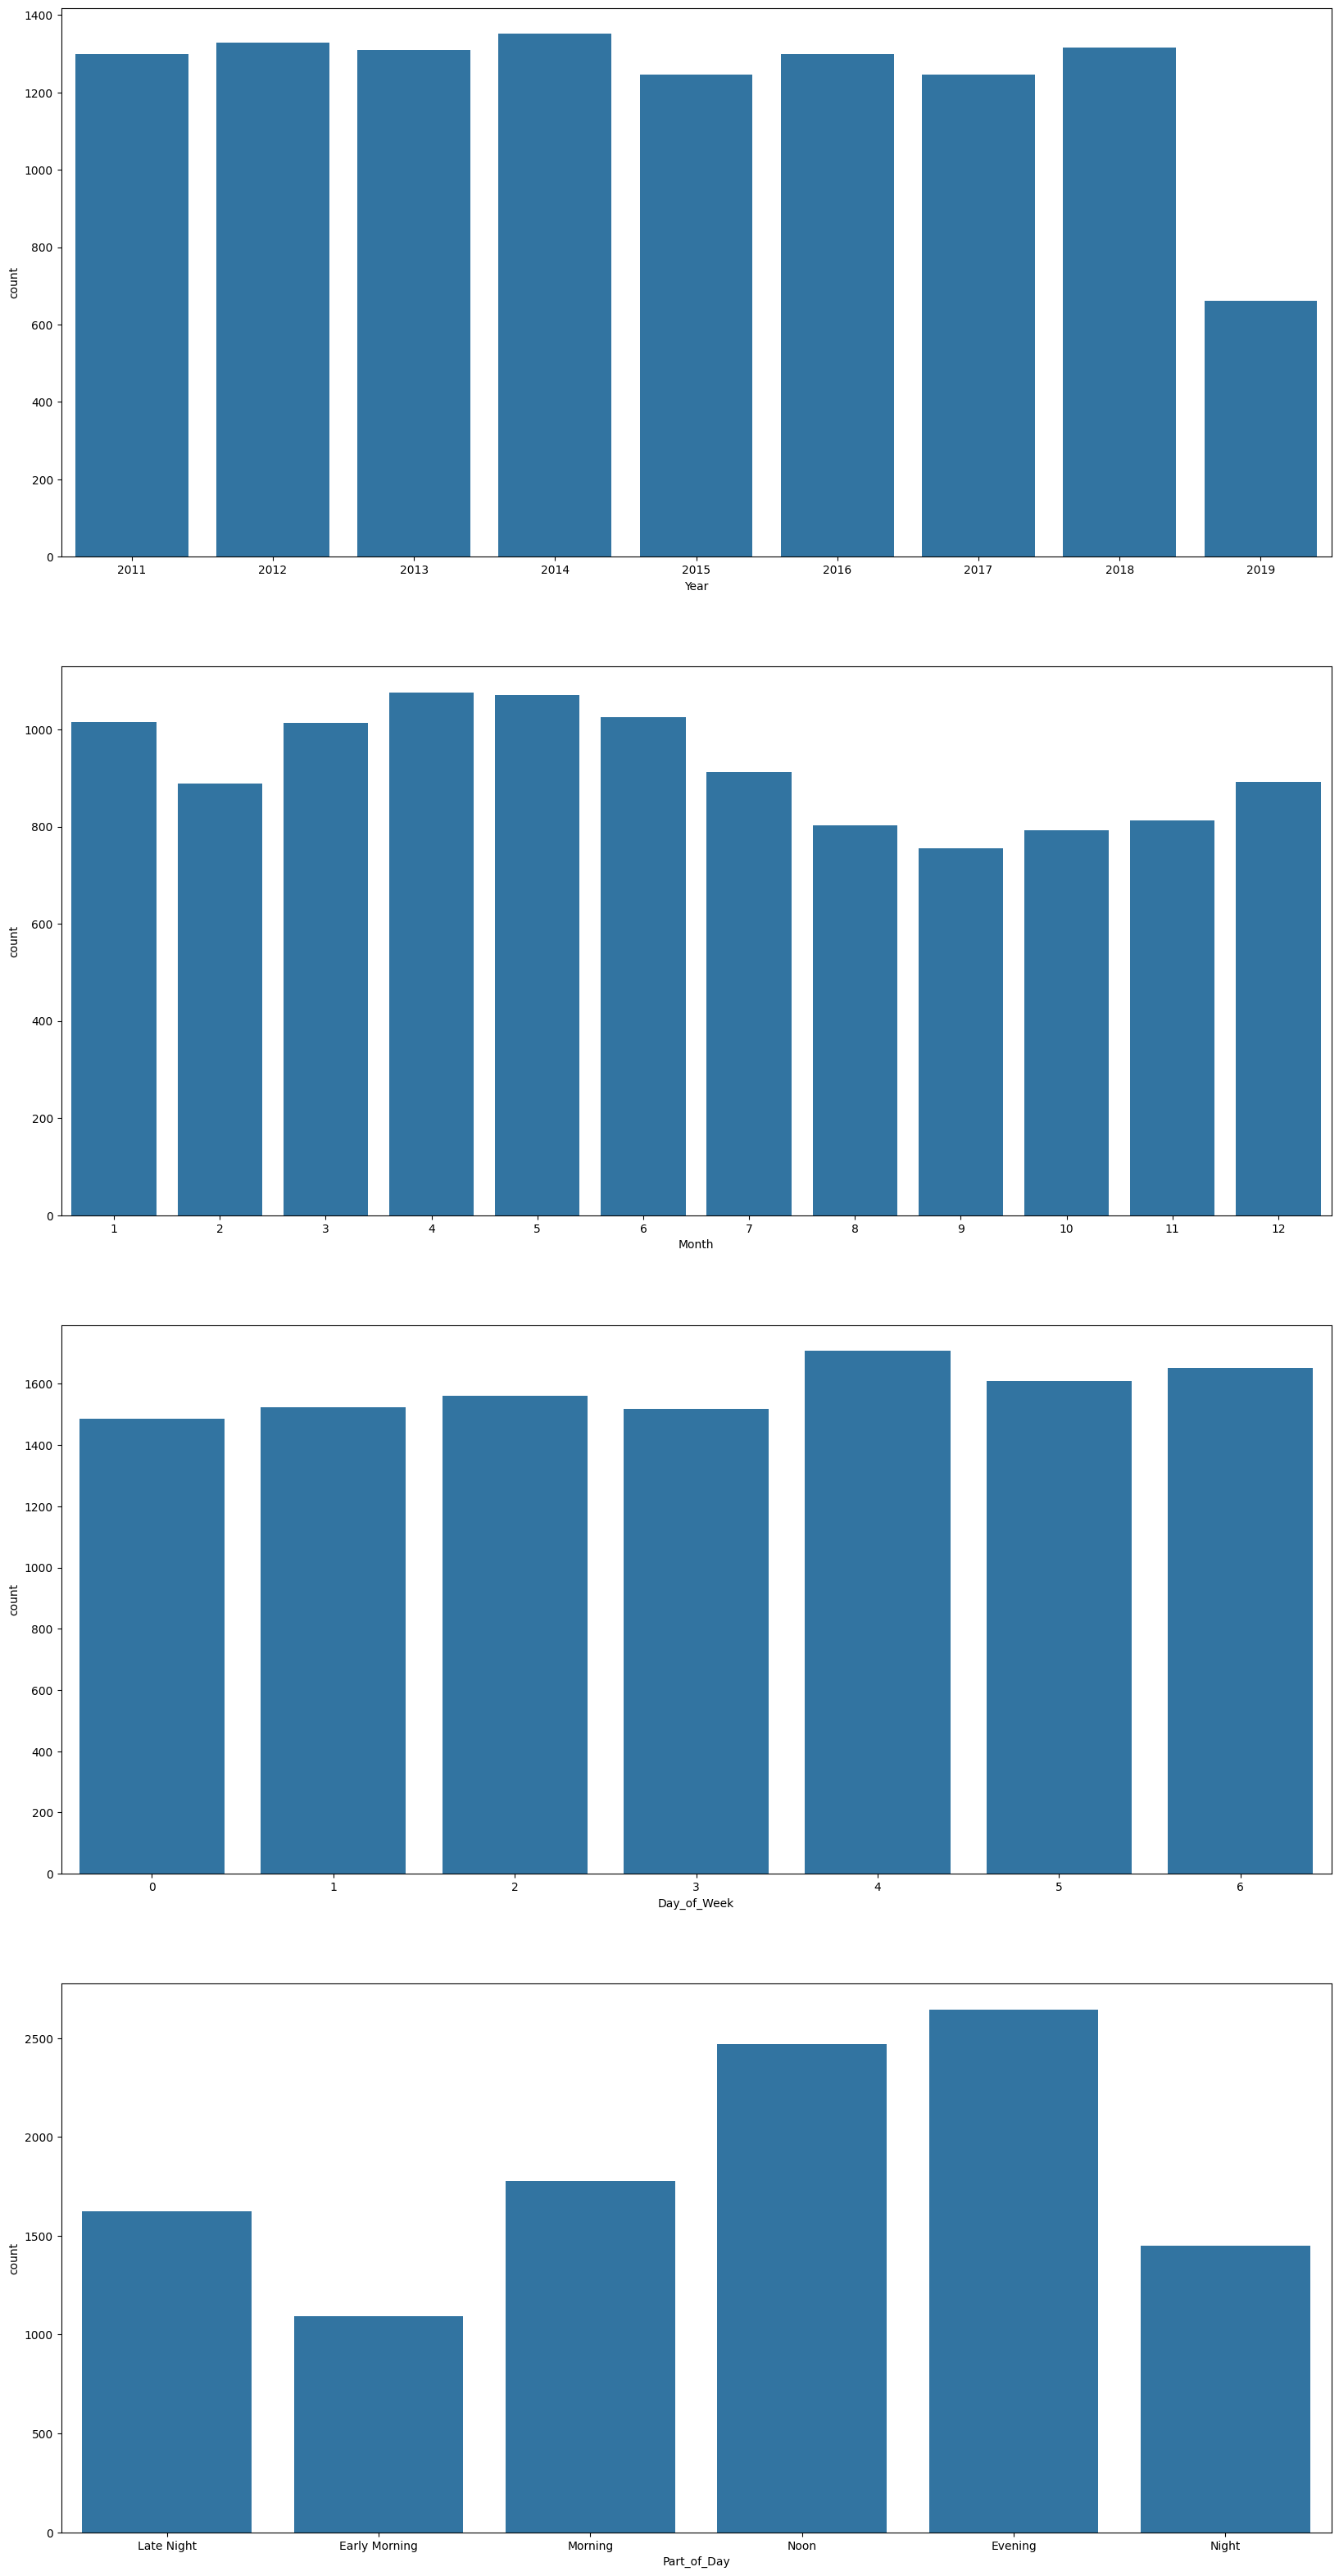

In [37]:
fig, axes = plt.subplots(4, 1, figsize=(20,40))

sns.countplot(data=df, x='Year', ax=axes[0])
sns.countplot(data=df, x='Month', ax=axes[1])
sns.countplot(data=df, x='Day_of_Week', ax=axes[2])
sns.countplot(data=df, x='Part_of_Day', ax=axes[3])

Most incidents occur in march, april in the noon or evening

In [38]:
new_dict = {
    'Min' : [df.Reaction_time_minutes.min(), df.Extinguish_time_minutes.min(), df.Time_spent_minutes.min()],
    '25%' : [df.Reaction_time_minutes.quantile(q=0.25), df.Extinguish_time_minutes.quantile(q=0.25), df.Time_spent_minutes.quantile(q=0.25)],
    'Median' : [statistics.median(df.Reaction_time_minutes), statistics.median(df.Extinguish_time_minutes),  statistics.median(df.Time_spent_minutes)],
    '75%' : [df.Reaction_time_minutes.quantile(q=0.75), df.Extinguish_time_minutes.quantile(q=0.75), df.Time_spent_minutes.quantile(q=0.75)],
    'Max' : [df.Reaction_time_minutes.max(), df.Extinguish_time_minutes.max(), df.Time_spent_minutes.max()]}

new_df = pd.DataFrame(new_dict, index = ['Reaction Time in Minutes', 'Extinguish Time in Minutes', 'Total Time Spent in Minutes'])
new_df.head()

Min    25%  Median     75%      Max
Reaction Time in Minutes     0.40   4.07   4.850   5.770   297.85
Extinguish Time in Minutes   0.00   2.18   6.050  13.330  2008.17
Total Time Spent in Minutes  0.05  27.95  49.325  88.055  5063.38

In these features it also stands out that the maximum values are far above the median and quartile values.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Time_spent_minutes'>

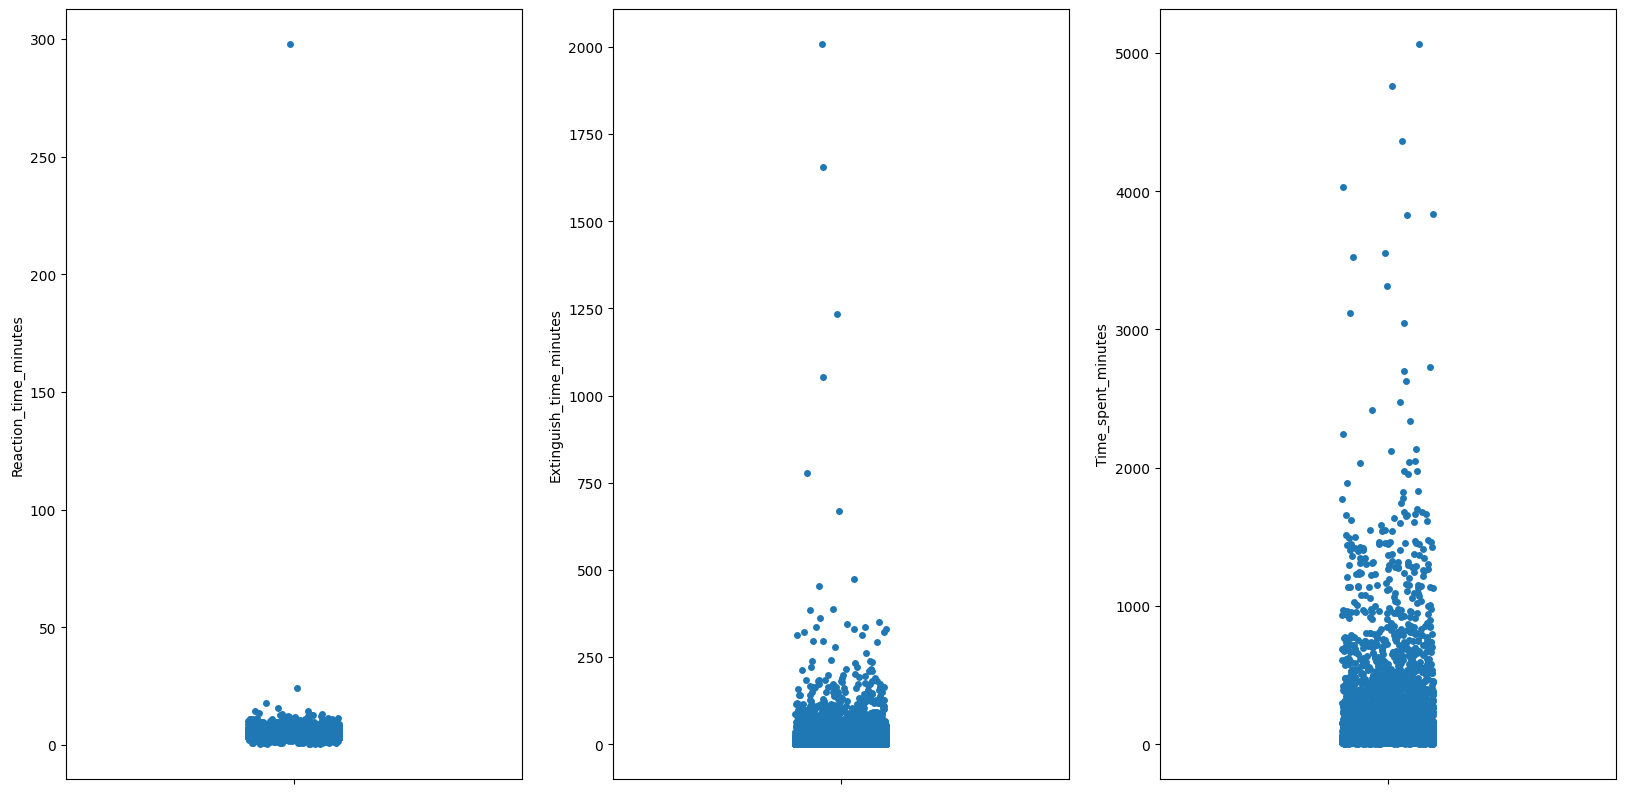

In [39]:
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.stripplot(data=df, y='Reaction_time_minutes', ax=axes[0])
sns.stripplot(data=df, y='Extinguish_time_minutes', ax=axes[1])
sns.stripplot(data=df, y='Time_spent_minutes', ax=axes[2])

One outlier in the Reaction time column where it took almost 300 minutes. And some outliers in the extuinguish time feature.

In [40]:
df[(df.Reaction_time_minutes > 250)]

Area_of_Origin           Business_Impact  Civilian_Casualties  \
1146  Porch or Balcony  No business interruption                    0   

      Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
1146                         0                   1000   

      Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
1146                                      0         2019-05-31 12:01:25   

                               Extent_Of_Fire  \
1146  Confined to part of room/area of origin   

                 Fire_Alarm_System_Impact_on_Evacuation  \
1146  Not applicable: Occupant(s) first alerted by o...   

     Fire_Alarm_System_Operation Fire_Alarm_System_Presence  \
1146  Fire alarm system operated  Fire alarm system present   

     Fire_Under_Control_Time  \
1146     2019-05-31 12:03:45   

                                        Ignition_Source  \
1146  Smoker's Articles (eg. cigarettes, cigars, pip...   

      Incident_Station_Area  Incident_Ward Last_TFS_Unit_Clear_Time  \
1146                    245           21.0      2019-05-31 12:29:00   

       Latitude  Longitude        Material_First_Ignited  \
1146  43.771574 -79.285951  Books, Magazines, Newspapers   

               Method_Of_Fire_Control  \
1146  Extinguished by fire department   

                                        Possible_Cause  \
1146  Other misuse of ignition source/material ignited   

                             Property_Use  \
1146  Multi-Unit Dwelling - Over 12 Units   

          Smoke_Alarm_at_Fire_Origin_Alarm_Failure  \
1146  Remote from fire – smoke did not reach alarm   

     Smoke_Alarm_at_Fire_Origin_Alarm_Type  \
1146                Hardwired (standalone)   

                              Status_of_Fire_On_Arrival      TFS_Alarm_Time  \
1146  Fire with smoke showing only - including vehic... 2019-05-31 07:00:00   

        TFS_Arrival_Time  Year  Month  Day_of_Week Part_of_Day  \
1146 2019-05-31 11:57:51  2019      5            4     Morning   

      Reaction_time_minutes  Extinguish_time_minutes  Time_spent_minutes  
1146                 297.85                      5.9               31.15

In [41]:
df = df[(df.Extinguish_time_minutes < 750) & (df.Reaction_time_minutes < 250)]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Time_spent_minutes'>

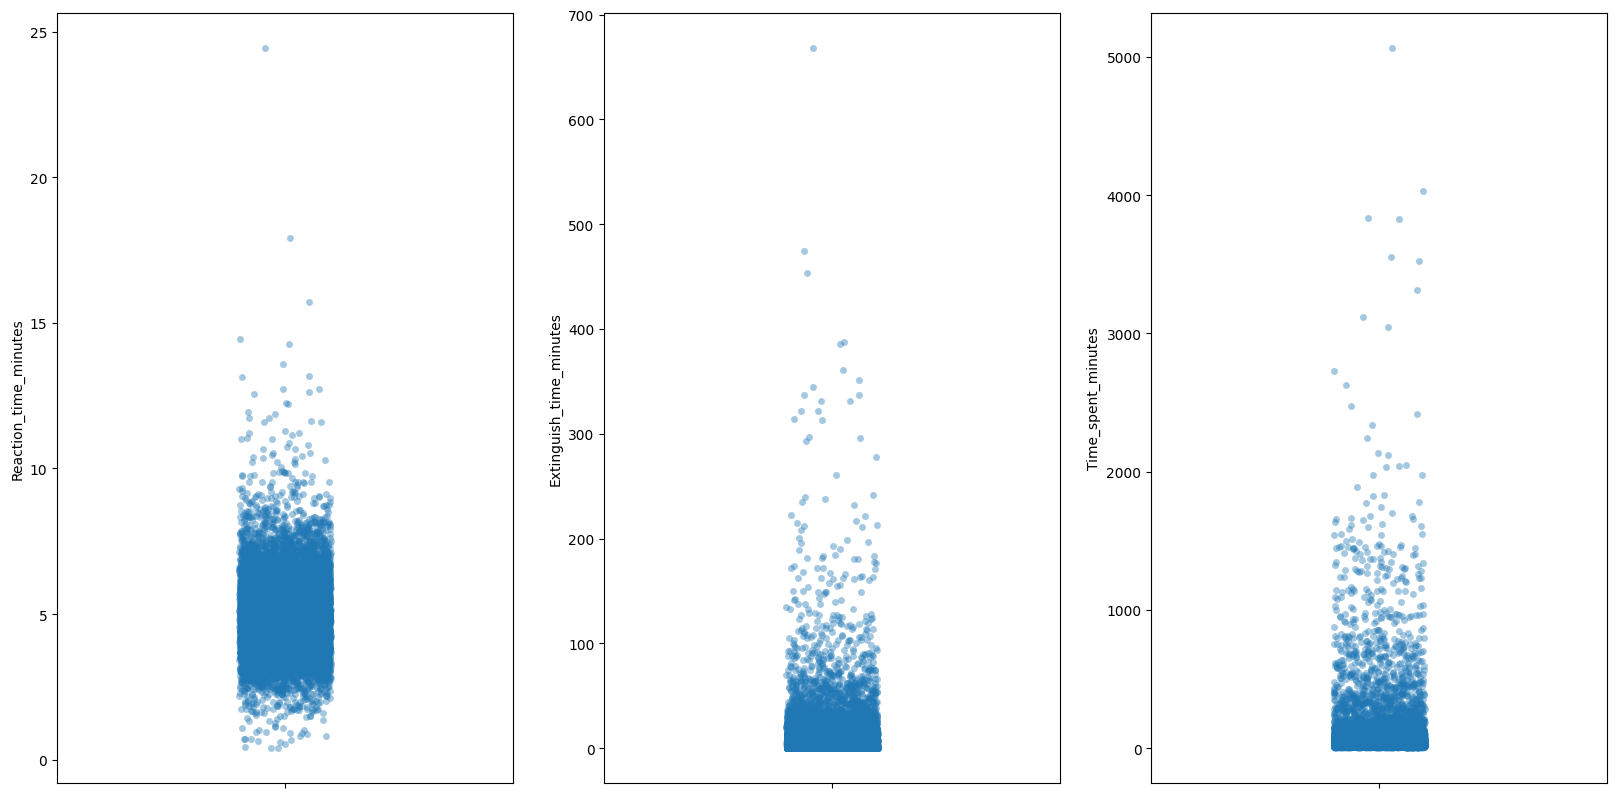

In [42]:
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.stripplot(data=df, y='Reaction_time_minutes', alpha=0.4, ax=axes[0])
sns.stripplot(data=df, y='Extinguish_time_minutes', alpha=0.4, ax=axes[1])
sns.stripplot(data=df, y='Time_spent_minutes', alpha=0.4, ax=axes[2])

## **Exploratory Data Analysis**

For the data analysis I change the civilian casualties feature to a target column consisting of Casualties or No Casualties, the data analysis will focus on what factors determine whether there will be casualties in order to help inform firefighters and the public.

In [43]:
df_hue = df
df_hue.loc[df_hue.Civilian_Casualties > 0, 'Civilian_Casualties'] = 'Casualties'
df_hue.loc[df_hue.Civilian_Casualties == 0, 'Civilian_Casualties'] = 'No Casualties'
df_hue.head()

<ipython-input-43-38f526a1a11b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Casualties' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hue.loc[df_hue.Civilian_Casualties > 0, 'Civilian_Casualties'] = 'Casualties'


Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                                              Other   
4  Sleeping Area or Bedroom (inc. patients room, ...   

                   Business_Impact Civilian_Casualties  \
0         No business interruption       No Casualties   
1                     Undetermined       No Casualties   
2  Not applicable (not a business)          Casualties   
3        May not resume operations       No Casualties   
4  Not applicable (not a business)          Casualties   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   
1                        28                  50000   
2                        16                1000000   
3                        12                1000000   
4                        11                 125000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24 17:06:26   
1                                     28         2018-11-24 07:19:00   
2                                    130         2017-02-09 18:02:13   
3                                     14         2012-10-30 00:52:04   
4                                      2         2018-07-08 04:35:00   

                             Extent_Of_Fire  \
0              Confined to object of origin   
1   Confined to part of room/area of origin   
2  Spread beyond room of origin, same floor   
3                          Entire Structure   
4  Spread beyond room of origin, same floor   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   
1  Not applicable: Occupant(s) first alerted by o...   
2  Some persons (at risk) evacuated as a result o...   
3                                       Undetermined   
4  Some persons (at risk) evacuated as a result o...   

                Fire_Alarm_System_Operation Fire_Alarm_System_Presence  \
0         Fire alarm system did not operate  Fire alarm system present   
1                Fire alarm system operated  Fire alarm system present   
2                Fire alarm system operated  Fire alarm system present   
3  Fire alarm system operation undetermined               Undetermined   
4                Fire alarm system operated  Fire alarm system present   

  Fire_Under_Control_Time                                    Ignition_Source  \
0     2018-08-24 17:06:28                                       Undetermined   
1     2018-11-24 07:19:00  Other Cooking Items (eg Toaster, Kettle, elec ...   
2     2017-02-09 18:36:21                                       Undetermined   
3     2012-10-30 01:28:48                                       Undetermined   
4     2018-07-08 04:38:28                                              Other   

   Incident_Station_Area  Incident_Ward Last_TFS_Unit_Clear_Time   Latitude  \
0                    114           18.0      2018-08-24 17:42:43  43.760357   
1                    142            7.0      2018-11-24 12:45:21  43.754542   
2                    325           27.0      2017-02-09 23:36:33  43.657300   
3                    332           20.0      2012-11-01 16:30:31  43.649350   
4                    442            5.0      2018-07-08 16:44:07  43.697960   

   Longitude      Material_First_Ignited           Method_Of_Fire_Control  \
0 -79.412479  Undetermined (formerly 98)  Extinguished by fire department   
1 -79.530419                     Plastic         Extinguished by occupant   
2 -79.373460  Undetermined (formerly 98)  Extinguished by fire department   
3 -79.393700  Undetermined (formerly 98)  Extinguished by fire department   
4 -79.511539                     Bedding  Extinguished by fire department   

        Possible_Cause                         Property_Use  \
0         Undetermined  Multi-Unit Dwelling - O

In [44]:
df_no_casualties = df_hue[(df_hue.Civilian_Casualties == "No Casualties")]
df_casualties = df_hue[(df_hue.Civilian_Casualties == "Casualties")]

I want to recreate the countplots that I made above however to do this I first need to balance the dataset.

In [45]:
df_sample = df_no_casualties.sample(frac=0.09)
balance = pd.concat([df_sample, df_casualties])
df_sample[:2]

Area_of_Origin           Business_Impact Civilian_Casualties  \
4618                    Other  No business interruption       No Casualties   
8093  Cooking Area or Kitchen  No business interruption       No Casualties   

      Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
4618                         0                    200   
8093                         0                 250000   

      Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
4618                                      0         2012-09-19 12:02:12   
8093                                      4         2016-02-24 18:55:23   

                                Extent_Of_Fire  \
4618              Confined to object of origin   
8093  Spread beyond room of origin, same floor   

                 Fire_Alarm_System_Impact_on_Evacuation  \
4618                                       Undetermined   
8093  Not applicable: Occupant(s) first alerted by o...   

     Fire_Alarm_System_Operation  \
4618  Not applicable (no system)   
8093  Not applicable (no system)   

                             Fire_Alarm_System_Presence  \
4618                                       Undetermined   
8093  Not applicable (bldg not classified by OBC OR ...   

     Fire_Under_Control_Time            Ignition_Source  \
4618     2012-09-19 12:02:12  Blow Torch, Bunsen Burner   
8093     2016-02-24 19:36:06    Stove, Range-top burner   

      Incident_Station_Area  Incident_Ward Last_TFS_Unit_Clear_Time  Latitude  \
4618                    122           25.0      2012-09-19 12:20:11  43.74757   
8093                    431            5.0      2016-02-25 07:39:32  43.63612   

      Longitude      Material_First_Ignited           Method_Of_Fire_Control  \
4618  -79.38640                        Wood        Action taken unclassified   
8093  -79.50013  Undetermined (formerly 98)  Extinguished by fire department   

                                        Possible_Cause       Property_Use  \
4618  Other misuse of ignition source/material ignited  Detached Dwelling   
8093                                        Unattended  Detached Dwelling   

               Smoke_Alarm_at_Fire_Origin_Alarm_Failure  \
4618  Not applicable: Alarm operated OR presence/ope...   
8093  Not applicable: Alarm operated OR presence/ope...   

     Smoke_Alarm_at_Fire_Origin_Alarm_Type  \
4618                     Type undetermined   
8093                      Battery operated   

                              Status_of_Fire_On_Arrival      TFS_Alarm_Time  \
4618  Fire with smoke showing only - including vehic... 2012-09-19 11:55:06   
8093  Flames showing from small area (one storey or ... 2016-02-24 18:47:21   

        TFS_Arrival_Time  Year  Month  Day_of_Week Part_of_Day  \
4618 2012-09-19 11:59:08  2012      9            2     Morning   
8093 2016-02-24 18:54:19  2016      2            2     Evening   

      Reaction_time_minutes  Extinguish_time_minutes  Time_spent_minutes  
4618                   4.03                     3.07               21.05  
8093                   6.97                    41.78              765.22

In [46]:
print(f'Length of No Casualties:           {len(df_no_casualties)}')
print(f'Length of Casualties:              {len(df_casualties)}')
print(f'Length of Sample of No Casualties: {len(df_sample)}')
print(f'Length of Balanced DataFrame:      {len(balance)}')

Length of No Casualties:           10119
Length of Casualties:              931
Length of Sample of No Casualties: 911
Length of Balanced DataFrame:      1842


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Area_of_Origin'>

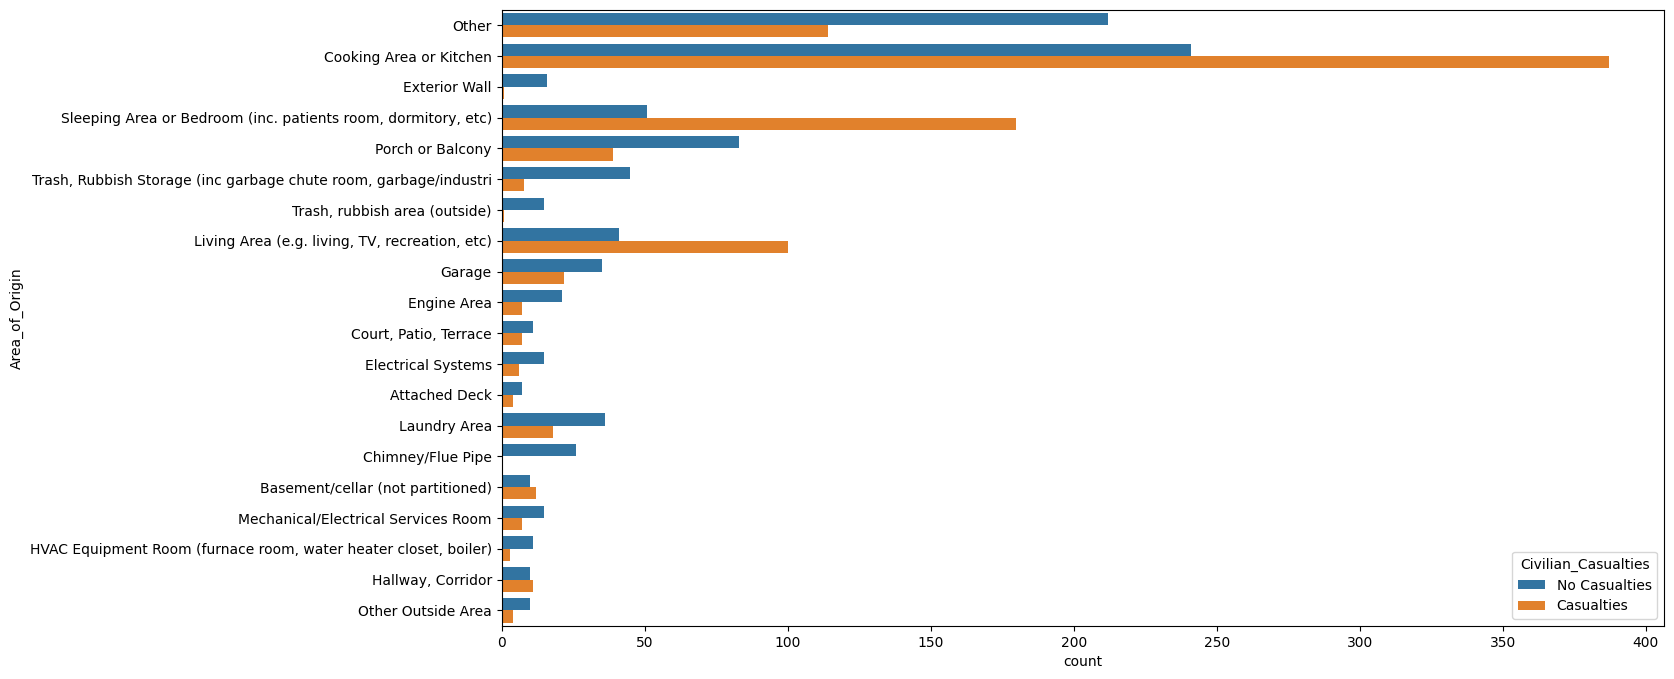

In [47]:
sns.countplot(data=balance, y='Area_of_Origin', hue='Civilian_Casualties')

**The most dangerous area's are the cooking area and sleeping area's.**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Extent_Of_Fire'>

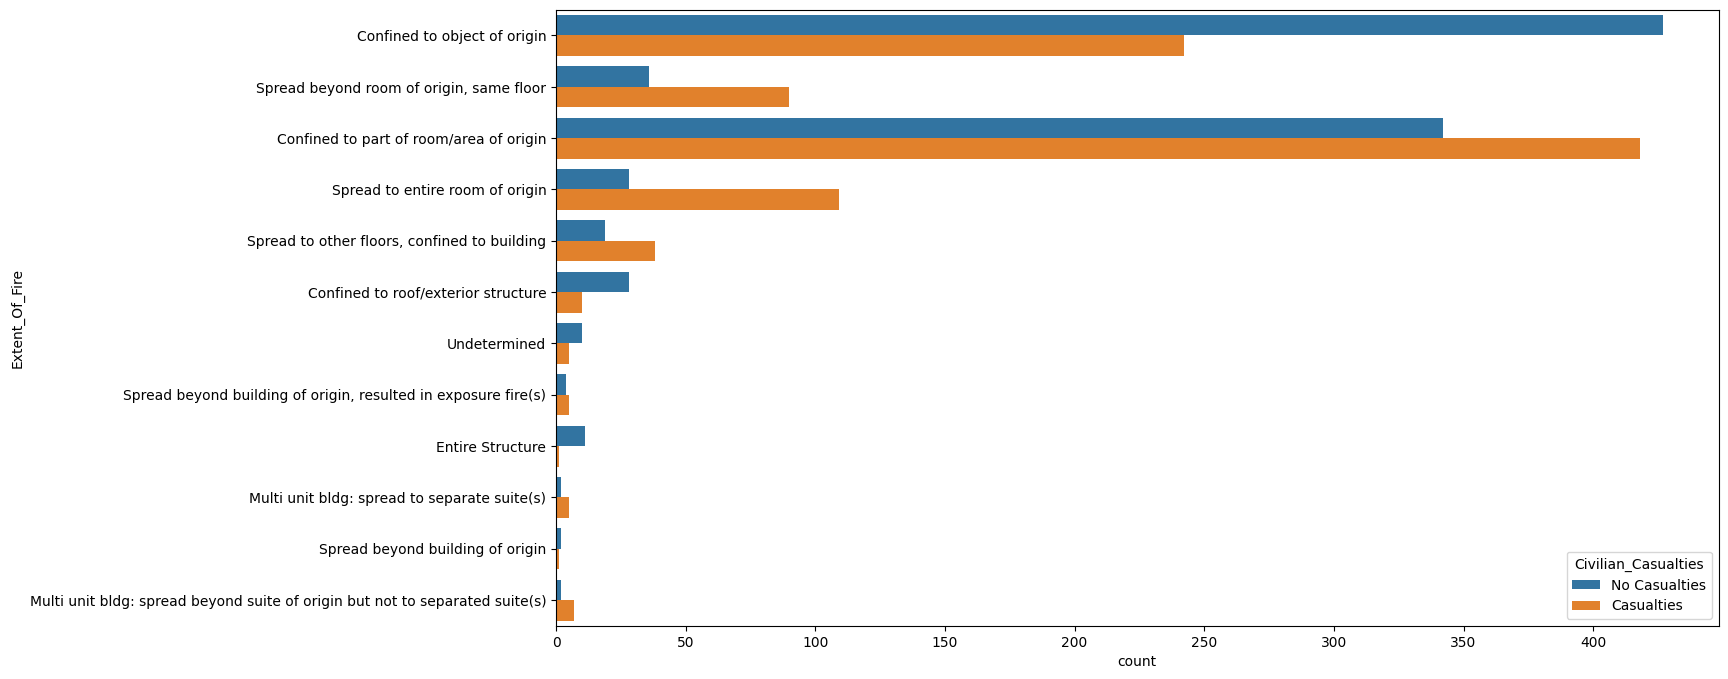

In [48]:
sns.countplot(data=balance, y='Extent_Of_Fire', hue='Civilian_Casualties')

Unsuprisingly incidents that are confined to a smaller area are not as lethal as fires that spread.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Fire_Alarm_System_Impact_on_Evacuation'>

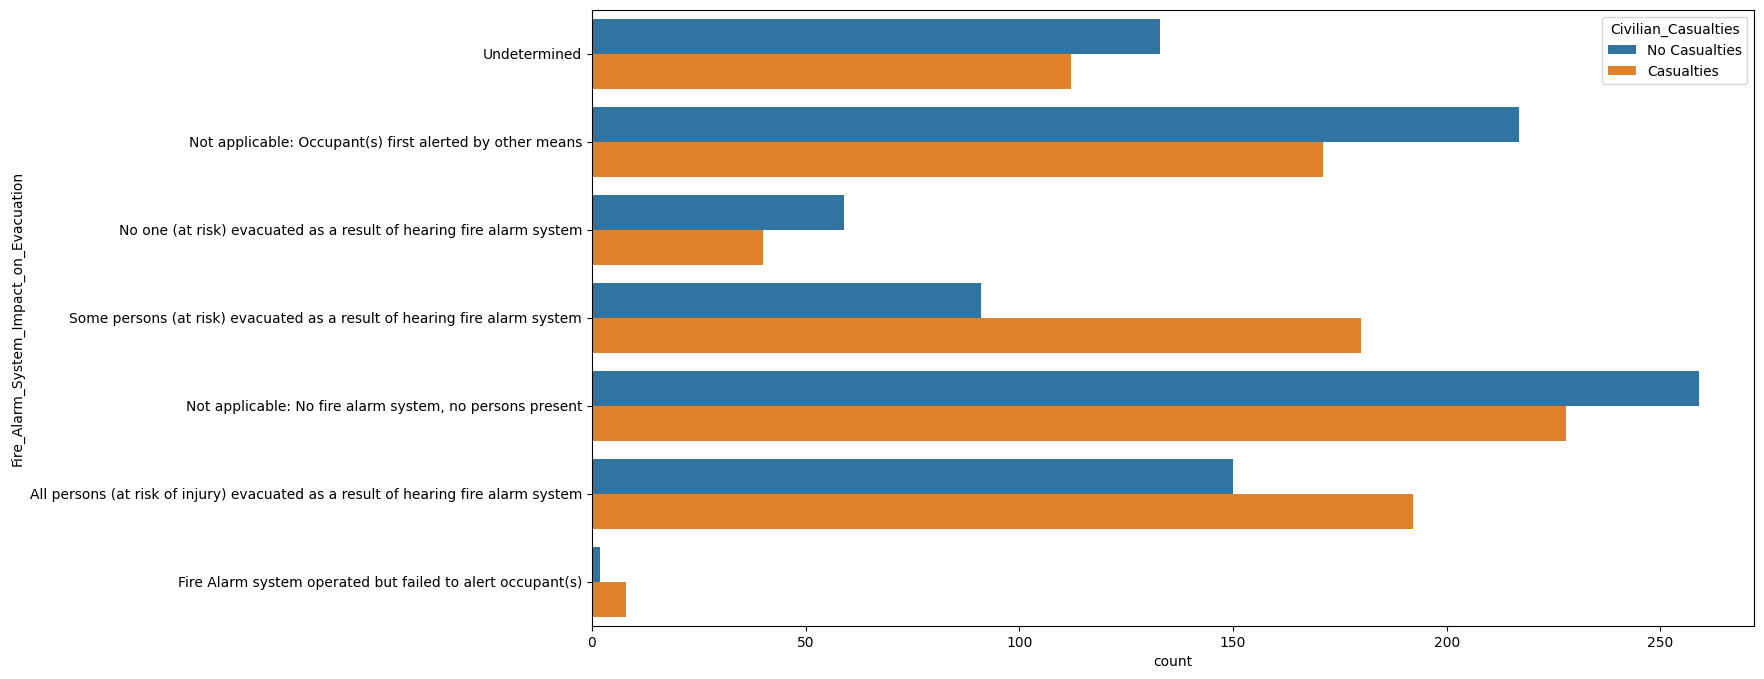

In [49]:
sns.countplot(data=balance, y='Fire_Alarm_System_Impact_on_Evacuation', hue='Civilian_Casualties')

Counterintuitively this plot shows that evacuating people causes more casualties

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Fire_Alarm_System_Presence'>

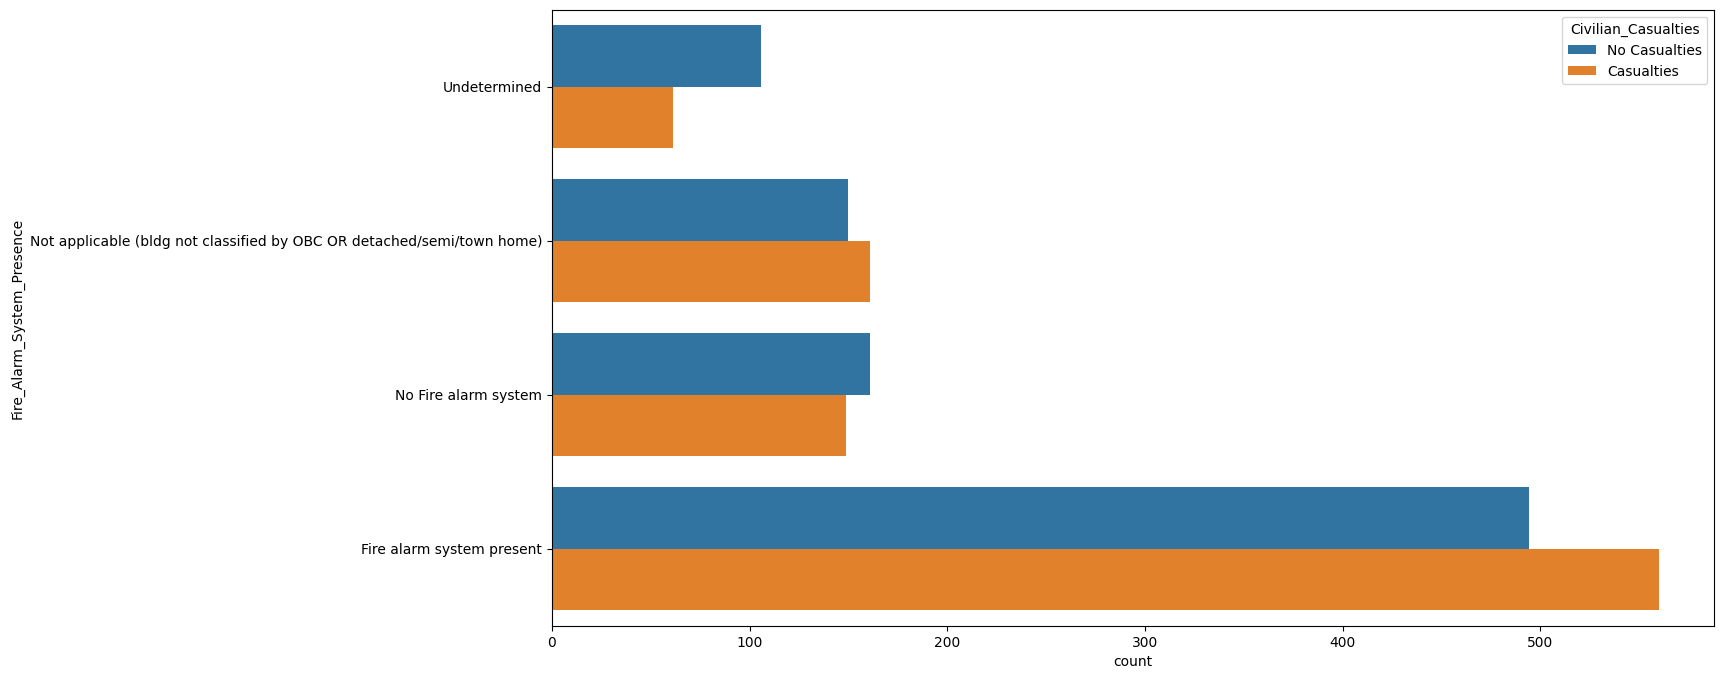

In [50]:
sns.countplot(data=balance, y='Fire_Alarm_System_Presence', hue='Civilian_Casualties')

The presence of the fire alarm does not seem to hold statistical significance.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Material_First_Ignited'>

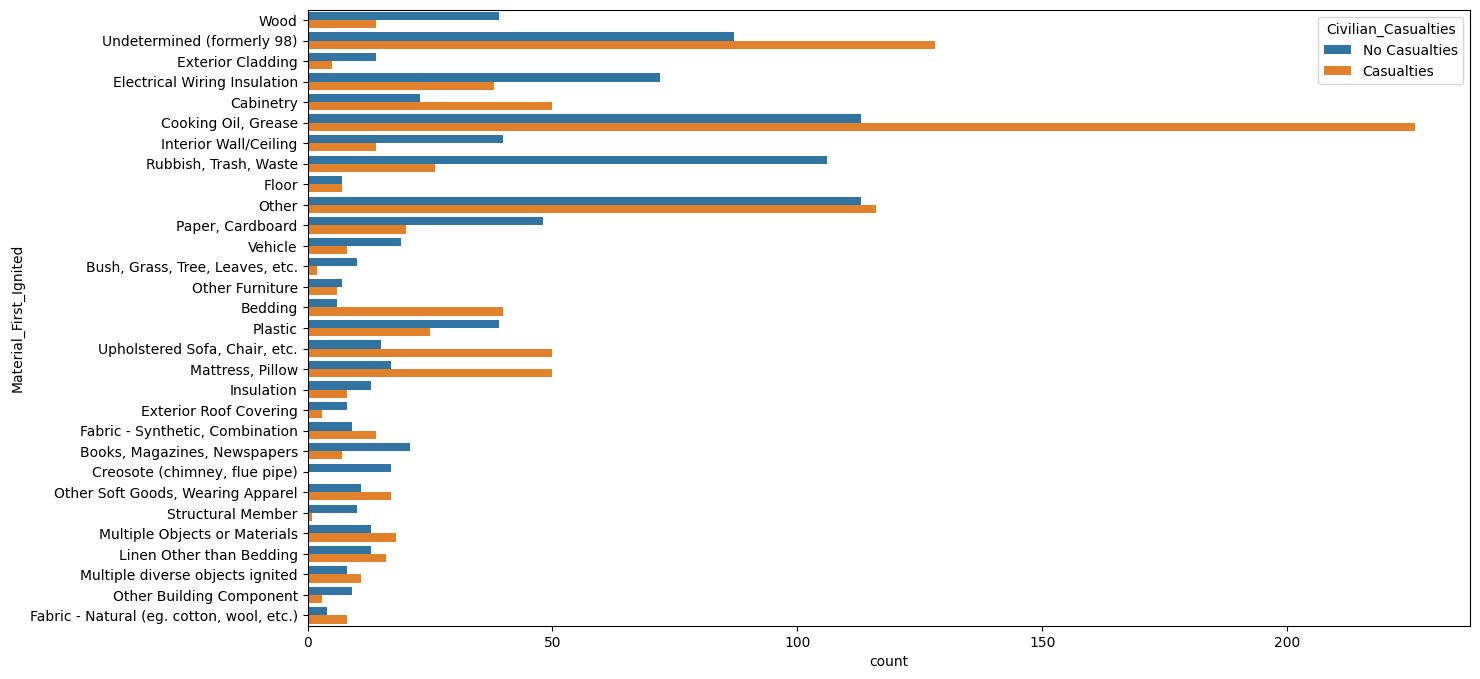

In [51]:
sns.countplot(data=balance, y='Material_First_Ignited', hue='Civilian_Casualties')

The most dangerous materials are cooking oil, cabinetry, bedding and mattresses/pillows.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Method_Of_Fire_Control'>

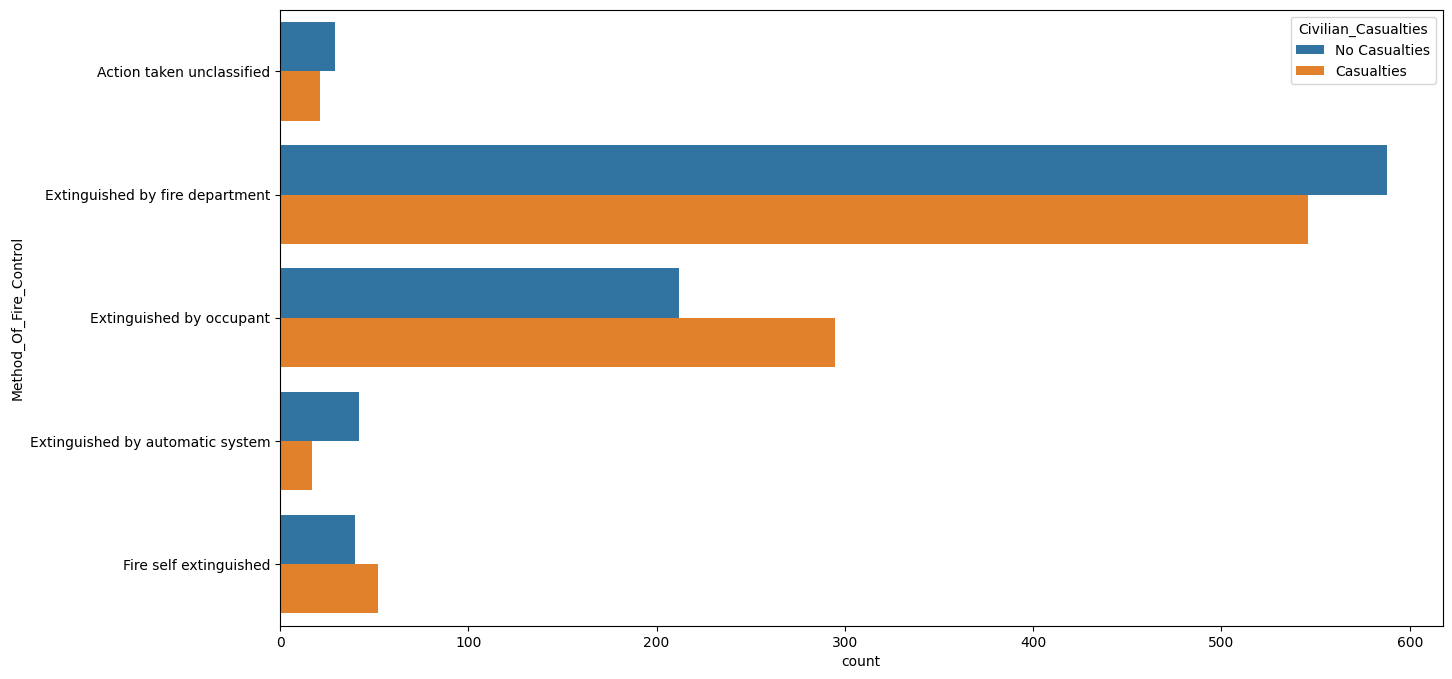

In [52]:
sns.countplot(data=balance, y='Method_Of_Fire_Control', hue='Civilian_Casualties')

There are more casualties when occupents try to put out the fire themselves. Also automatic systems reduce casualties a lot.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Possible_Cause'>

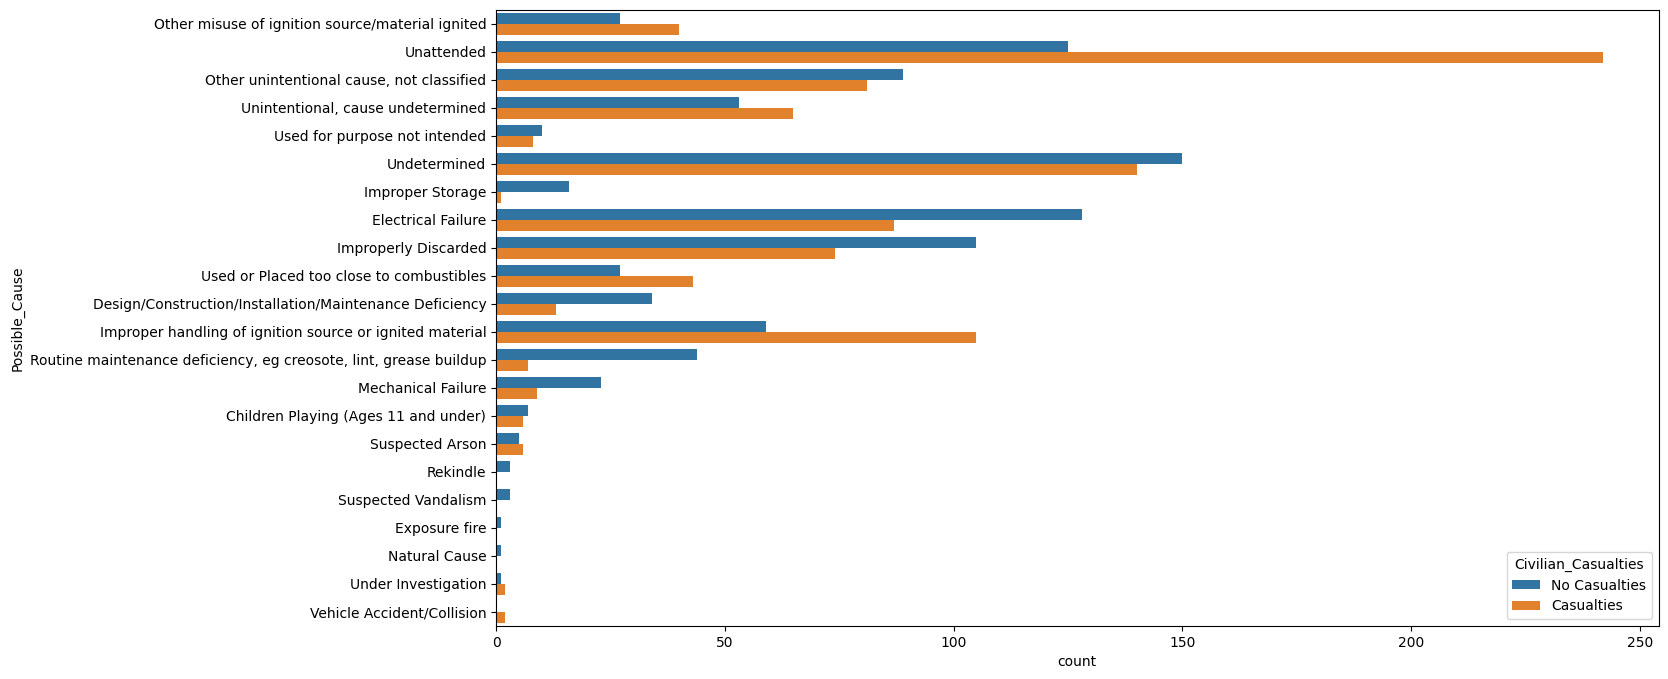

In [53]:
sns.countplot(data=balance, y='Possible_Cause', hue='Civilian_Casualties')

The most common probable causes that result in casualties are not paying attention(unattended) and improper handling of the ignition source.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Property_Use'>

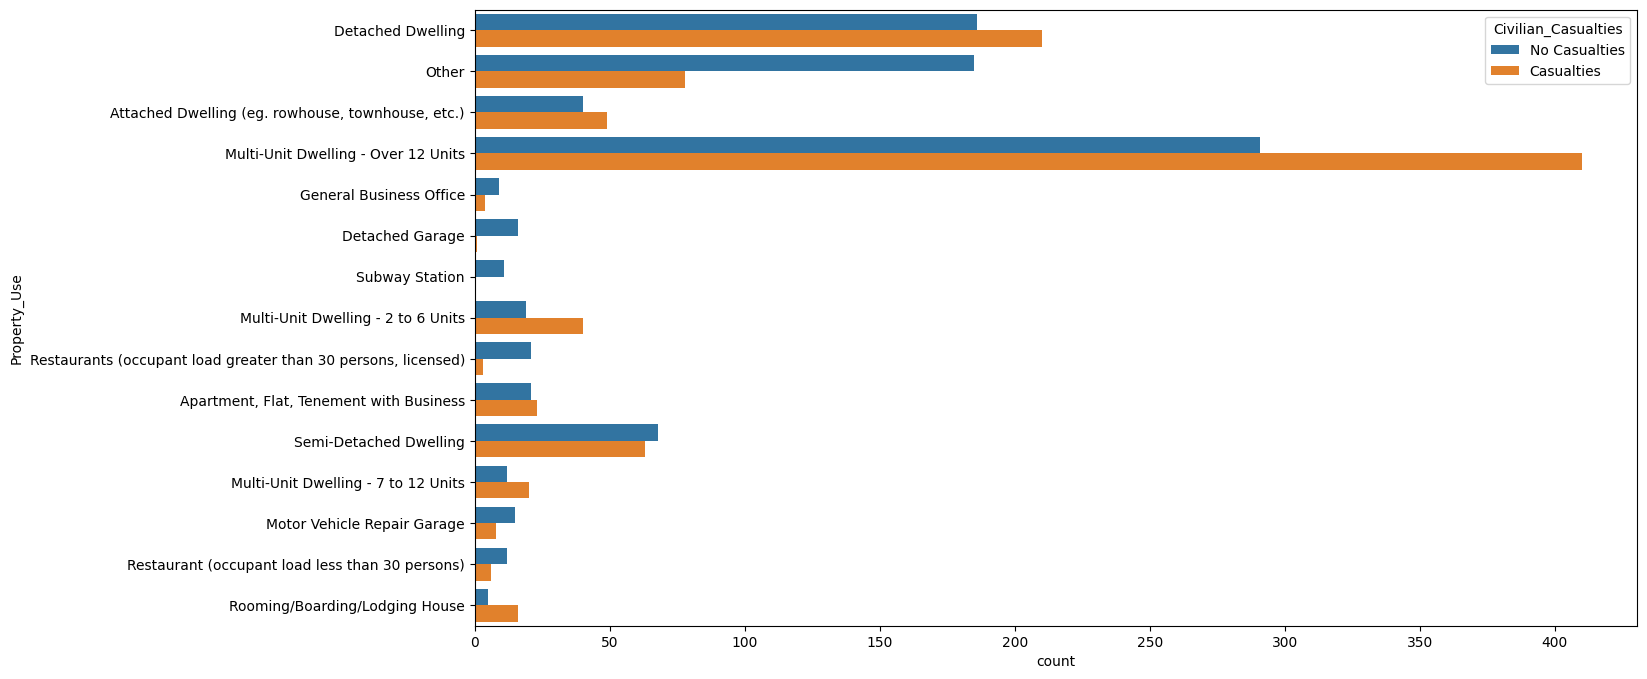

In [54]:
sns.countplot(data=balance, y='Property_Use', hue='Civilian_Casualties')

Multi-unit dwellings are more dangerous properties

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Smoke_Alarm_at_Fire_Origin_Alarm_Failure'>

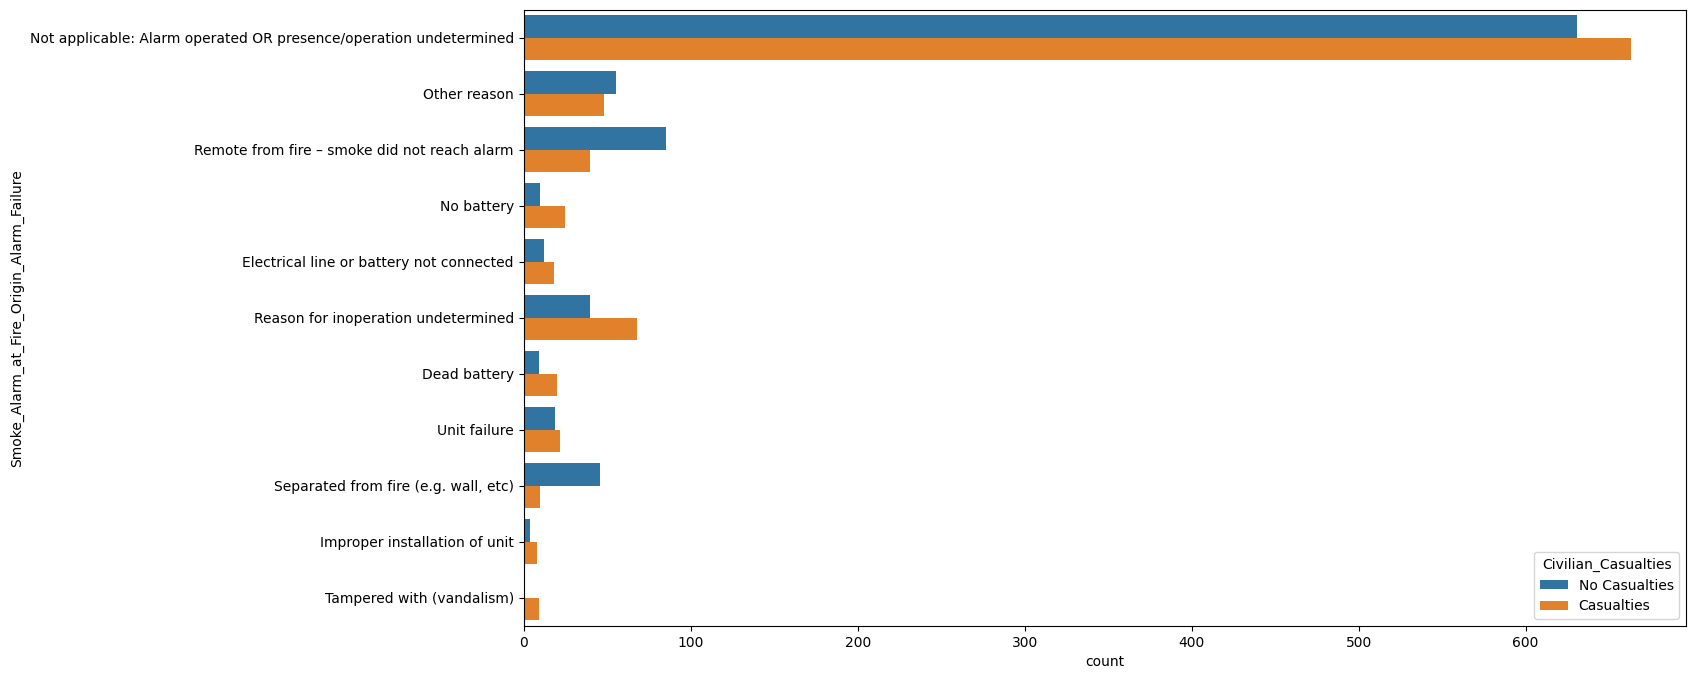

In [55]:
sns.countplot(data=balance, y='Smoke_Alarm_at_Fire_Origin_Alarm_Failure', hue='Civilian_Casualties')

mproper use of a fire alarm is dangerous

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='count', ylabel='Smoke_Alarm_at_Fire_Origin_Alarm_Type'>

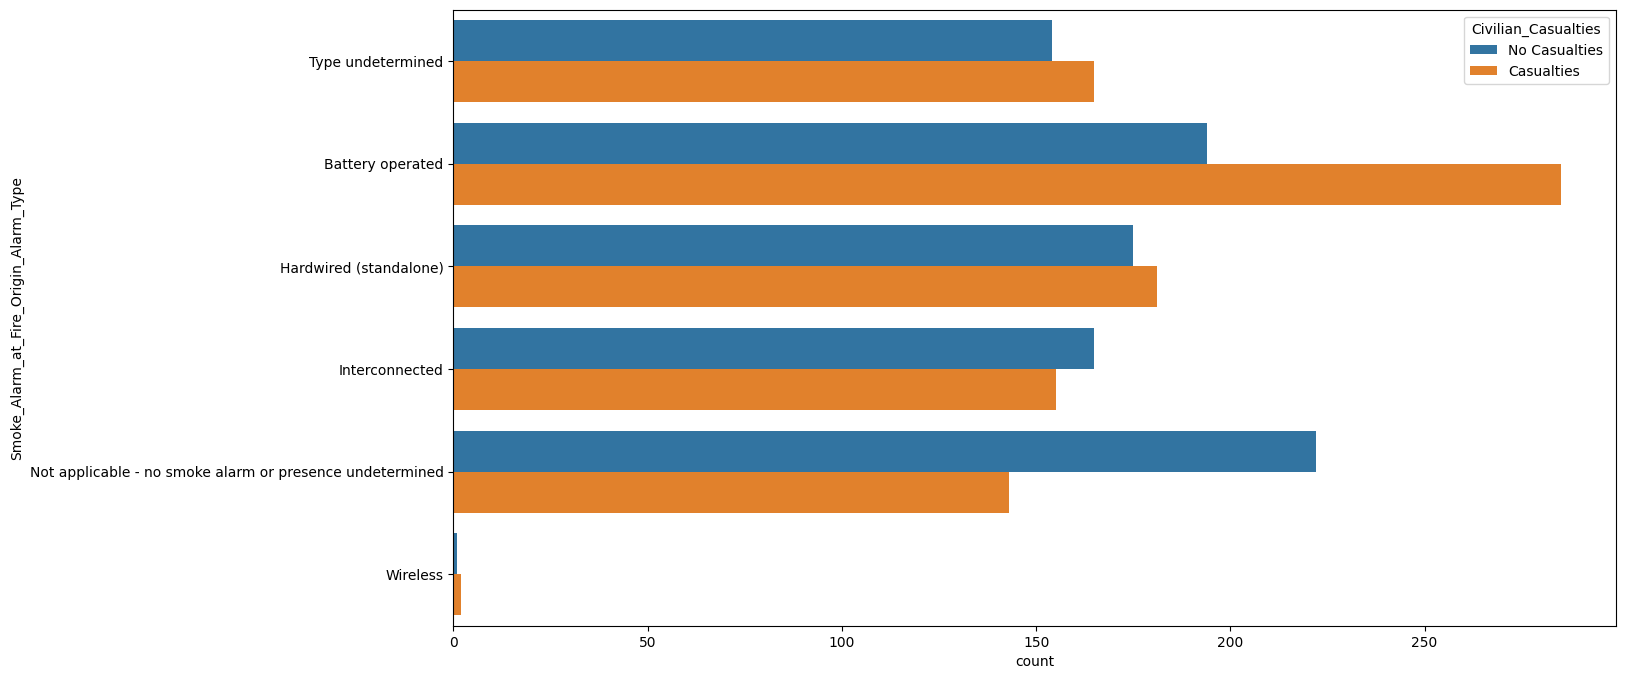

In [56]:
sns.countplot(data=balance, y='Smoke_Alarm_at_Fire_Origin_Alarm_Type', hue='Civilian_Casualties')

Battery operated fire alarms are more common when there are casualties

## **Continuous Data**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Civilian_Casualties', ylabel='Reaction_time_minutes'>

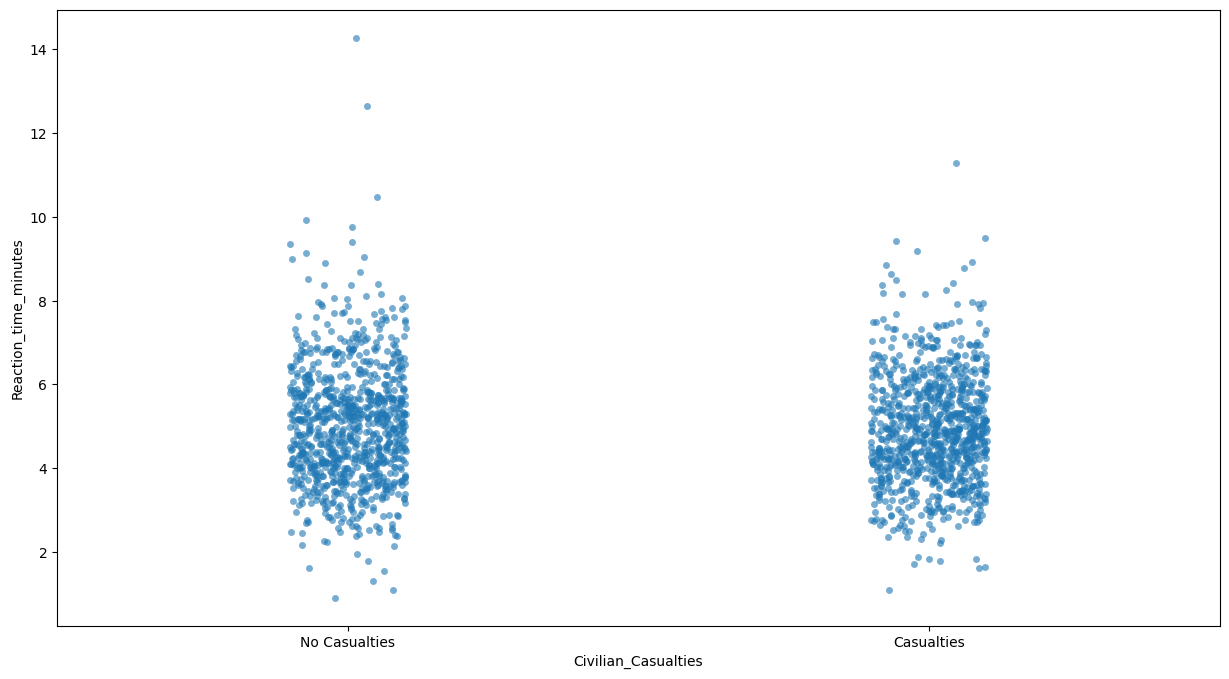

In [57]:
sns.stripplot(data=balance, y='Reaction_time_minutes', x='Civilian_Casualties', alpha=0.6)

Reaction time does not determine casualties

In [58]:
df.to_csv('output_fire_incidents', index=False)
balance.to_csv('output_fire_incidents_balanced', index=False)

Summary

* Casualties most often occur in the cooking and sleeping area’s.

* Fires that spread more often result in casualties.

* Evacuating people can result in more casualties.

* Casualties most often occur when improperly handling cooking oil, cabinetry, bedding and mattresses/pillows.

* Casualties occur more often when people try to put out the fire themselves, automatic systems are safest.

* Casualties occur more often in multi-unit properties.

* Risk increases when fire alarms are installed but do not work due to batteries, improper installation etc..

* Battery operated fire alarms are more dangerous than other types.